In [ ]:
# read data
data = read.table("hcmv.txt", header = TRUE)
head(data)

,location
,<int>
1,177
2,1321
3,1433
4,1477
5,3248
6,3255


In [ ]:
# install tidyverse
library(tidyverse)

# Exploratory data analysis

In [ ]:
summary(data)

    location     
 Min.   :   177  
 1st Qu.: 63714  
 Median :117826  
 Mean   :116960  
 3rd Qu.:171144  
 Max.   :228953  

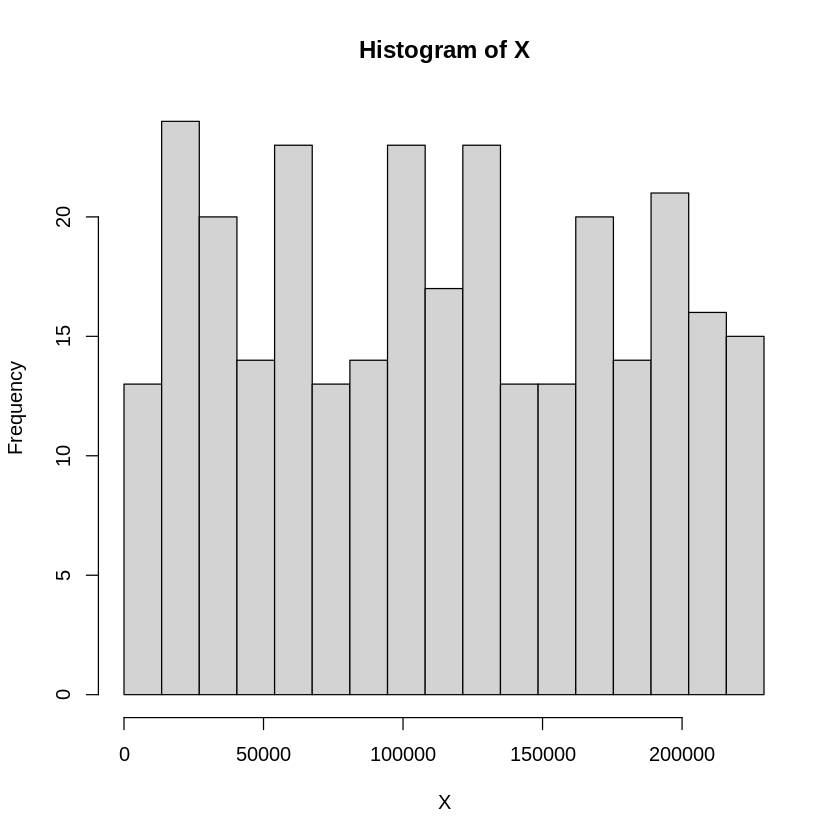

In [ ]:
# from lecture, creating a null hypothesis (uniform distribution) simulation:
L = 229364 # the DNA sequence of CMV is 229354 letters long
n = 296 # the amount of observations (palindromes) we have
X = sample(1:L, size = n, replace = F)
# how big to make one bin? Arbitrarily I will choose 13492, as L is divisible by that
M = 13492
X.hist = hist(X, breaks = seq(0, L, by = M))

In [ ]:
m = L/M #number of bins
m

[1] 17

In [ ]:
X.hist

$breaks
 [1]      0  13492  26984  40476  53968  67460  80952  94444 107936 121428
[11] 134920 148412 161904 175396 188888 202380 215872 229364

$counts
 [1] 13 24 20 14 23 13 14 23 17 23 13 13 20 14 21 16 15

$density
 [1] 3.255182e-06 6.009567e-06 5.007973e-06 3.505581e-06 5.759169e-06
 [6] 3.255182e-06 3.505581e-06 5.759169e-06 4.256777e-06 5.759169e-06
[11] 3.255182e-06 3.255182e-06 5.007973e-06 3.505581e-06 5.258371e-06
[16] 4.006378e-06 3.755980e-06

$mids
 [1]   6746  20238  33730  47222  60714  74206  87698 101190 114682 128174
[11] 141666 155158 168650 182142 195634 209126 222618

$xname
[1] "X"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

In [ ]:
# expected value for all null hypothesis simulations
expected = n/m
expected

[1] 17.41176

In [ ]:
# Poisson approximation: finding the upper and lower "limits". Values above/below these limits are considered
# significantly large or small
# plot(X.hist)
# abline(h= expected, col='blue') # expected
# abline(h = expected - 2*sqrt(expected), col = 'blue', lty = 2) # lower limit
# abline(h = expected + 2*sqrt(expected), col = 'blue', lty = 2) # upper limit (may betoo high to see)

In [ ]:
# Next, create a histogram of our observed data

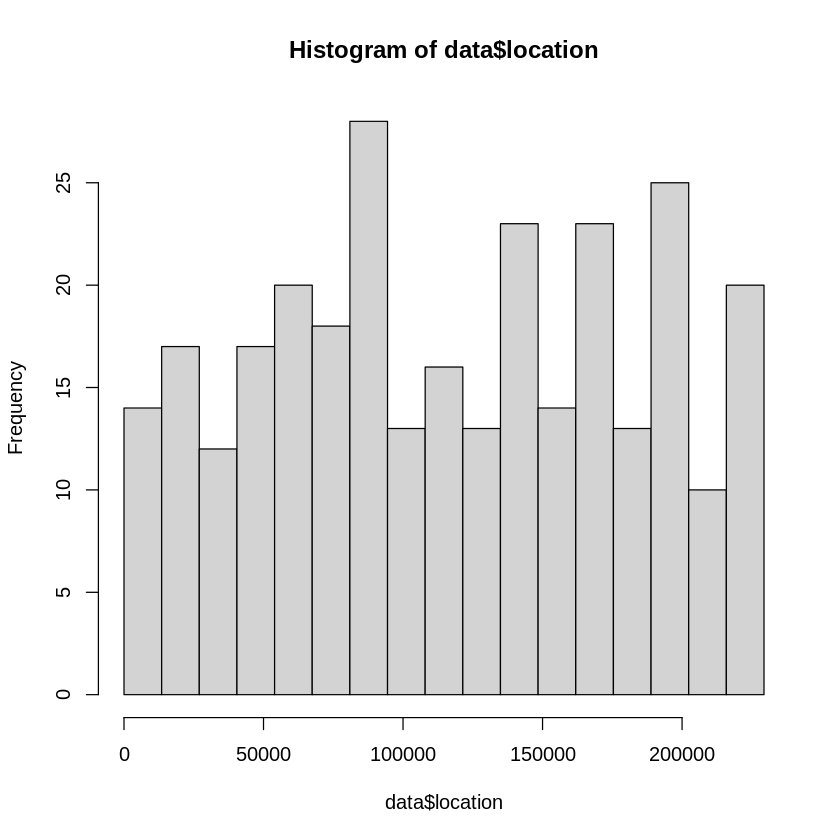

In [ ]:
L = 229364 # the DNA sequence of CMV is 229354 letters long
n = 296 # the amount of observations (palindromes) we have
# how big to make one bin? Arbitrarily I will choose 13492, as L is divisible by that
M = 13492
D.hist = hist(data$location, breaks = seq(0, L, by = M))

In [ ]:
D.hist

$breaks
 [1]      0  13492  26984  40476  53968  67460  80952  94444 107936 121428
[11] 134920 148412 161904 175396 188888 202380 215872 229364

$counts
 [1] 14 17 12 17 20 18 28 13 16 13 23 14 23 13 25 10 20

$density
 [1] 3.505581e-06 4.256777e-06 3.004784e-06 4.256777e-06 5.007973e-06
 [6] 4.507175e-06 7.011162e-06 3.255182e-06 4.006378e-06 3.255182e-06
[11] 5.759169e-06 3.505581e-06 5.759169e-06 3.255182e-06 6.259966e-06
[16] 2.503986e-06 5.007973e-06

$mids
 [1]   6746  20238  33730  47222  60714  74206  87698 101190 114682 128174
[11] 141666 155158 168650 182142 195634 209126 222618

$xname
[1] "data$location"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

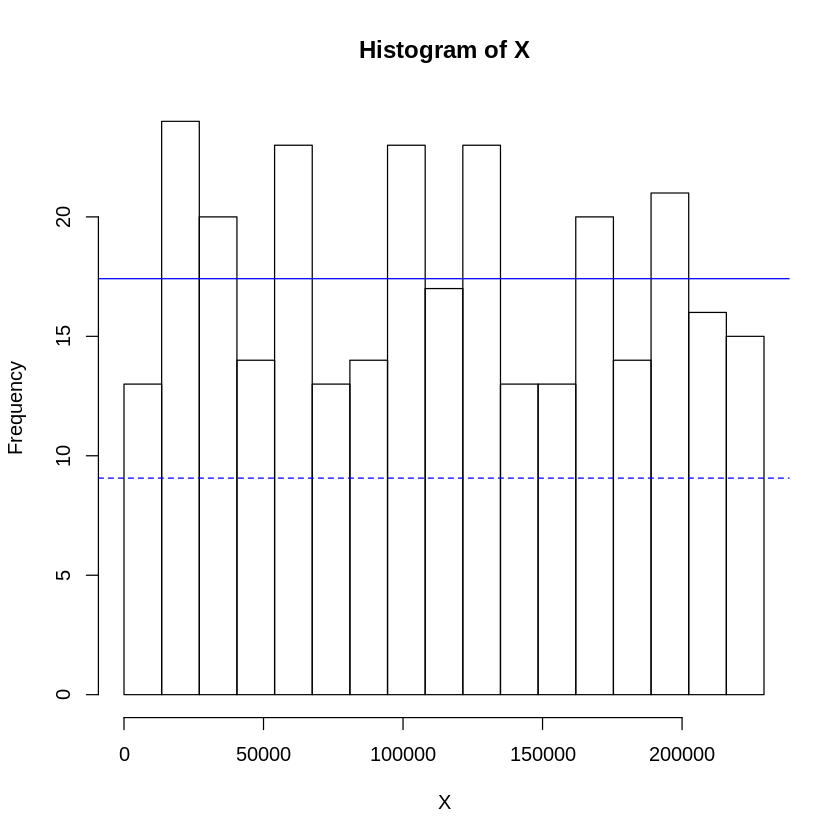

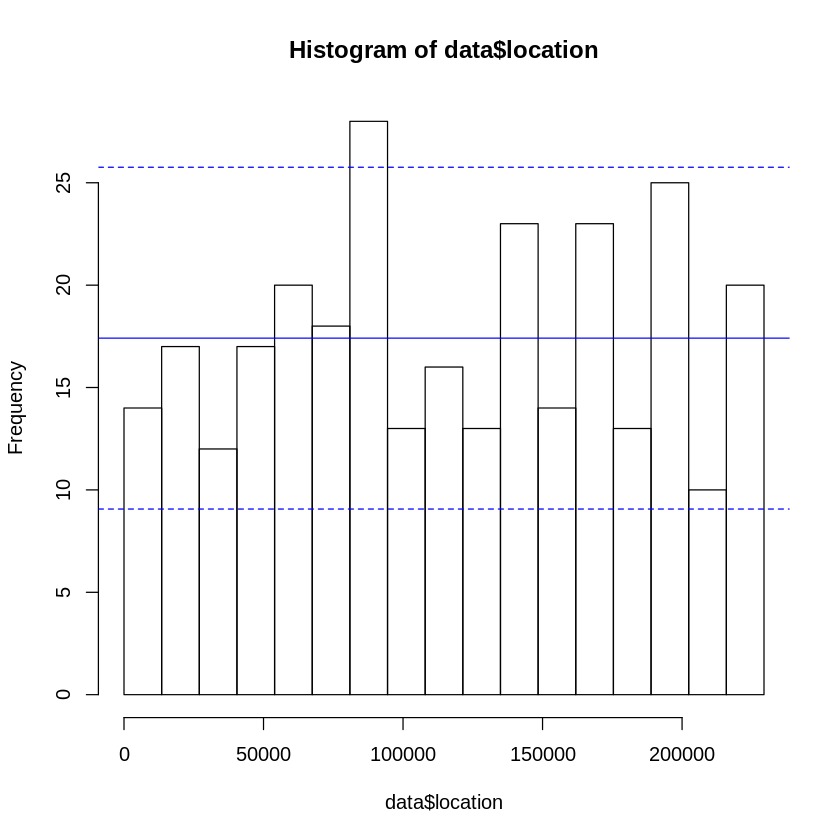

In [ ]:
plot(X.hist)
abline(h= expected, col='blue') # expected
abline(h = expected - 2*sqrt(expected), col = 'blue', lty = 2) # lower limit
abline(h = expected + 2*sqrt(expected), col = 'blue', lty = 2) # upper limit
plot(D.hist)
abline(h= expected, col='blue') # expected
abline(h = expected - 2*sqrt(expected), col = 'blue', lty = 2) # lower limit
abline(h = expected + 2*sqrt(expected), col = 'blue', lty = 2) # upper limit

Note: In most cases, none of the bars in X (the null hypothesis) are above the upper limit. However, there is one bar in our observed data that is above the upper limit. This appears to be the bin of [80952, 94444].

In [ ]:
# Was it just random chance that the null hypothesis histogram had no bars above the upper limit?
# Let's simulate multiple null hypothesis to see a value above the upper limit.
upper_expected = expected + 2*sqrt(expected)
upper_expected

[1] 25.75725

In [ ]:
# given a histogram object, this is how you would check whether any bar is higher than a certain value
# this one should be 0, or near to 0. Okay more like, if you got > 0 it's your lucky hour
sum(X.hist$counts > upper_expected)

[1] 0

In [ ]:
# out of 1000 histograms generated using the null hypothesis, does any have a bar higher than upper_expected?
bars_above_upper_expected = 0
for (i in 1:1000) {
  X = sample(1:L, size = n, replace = F)
  X.hist = hist(X, breaks = seq(0, L, by = M), plot = F)
  bars_above_upper_expected = bars_above_upper_expected + sum(X.hist$counts > upper_expected)
}
bars_above_upper_expected

[1] 479

In [ ]:
# So, it's not impossible for a bar in the null hypothesis histogram to be above the upper limit.
# How often can this occur?
# number of bins above upper limit / total number of bins generated, that is, (n_simulations * bins per simulation)
bars_above_upper_expected/(1000 * m)

[1] 0.02817647

Conclusion: The above percentage is like a p-value. From 1000 simulations of the null hypothesis ("palindromes are generated according to a uniform distribution"), 2.98% of the frequency bars were higher than the upper Poisson limit of upper_expected (25.8). In our observed data, there was one bar that was higher than the upper_expected limit. Thus, we MAY be able to reject this null hypothesis in the future, so that we may believe that our observed palindromes do not follow a uniform distribution. More formal testing is required to be confident.



# Finding the spacing between consecutive palindromes, consecutive pairs and consecutive triplets

In [ ]:
#using the sample data of the simulations in Q1
X

[1]  56804 156403 211716 154649 203328 129336 166681 160653  23268 198934
 [11] 206960 155244  13481  72597 200768  12505   1528 204705  65090  79219
 [21] 112992 209261 166767 216699 176986 113287  11541 197124  20783 209797
 [31]  52754  95463  56135 209719  92882  93109  41899   4783   9748 207458
 [41]  29818 102979 177265 130668 103200  72111 100070 104492  29452  97142
 [51] 148884 116975  17336  70754 113337 153582 102331  34730 211582 102822
 [61]  64244 144990 200590 208679 193086 185125 216201 171779 224623  56755
 [71]  77138  12717  19585  69509  56359 134145 134606 137169 143127 176834
 [81] 185725 220914  32928 113314  65547 209671 160836  34154 116764 195464
 [91]  78692 149409   5284  63733 136066  33995 148568  63361 174298 145965
[101]  44414  95736  44791    793  42058 147348  26543 136201 163676 166243
[111] 102011 196209  79687 146823 177410 139987 176535  76845 128986 140766
[121] 163956  77684 116498  77094 140657  87812  41032  64991 133699  42507
[131] 176948  68613  25683 215237  31398 118124  43363  98337  30616 217901
[141]  98164 170597   1607  32222 114550 228232 115770  12763  81021  88990
[151] 224199 190901  98959  44288 205371 188945 133682  32352 225271  23468
[161]  37748  37036  82169  40711 171900  25397  33210 220993 178756  17346
[171] 128854  65470 182650 219372 130448 149100 172840  76380 187567  46549
[181]  52920  47764 112833 130835  17219  94848 125443  48524  92784 113056
[191]  82816 214594 130308 116952  15010 218239  81257 143372 114982  44230
[201]  47937  68172 122336 161914 144887  62427 166729 109239 149226 183728
[211] 194031 131340 193900 104821 205731 184052 136899 115342 131034 206348
[221]  36830 171310 204913   6792   8144  67818 166882 162953   9531 150815
[231] 159825 196732  16854  19859  76252  57884 195500 165536  85321 174628
[241] 141338 204019  70352  67338  97292  61723  48542 219099 126246   8764
[251] 116143 167802  26128 172287 189974  47291  85065  28642 166235  11846
[261] 215392 118144  60624 184872 113257 138584  44560  22746 148259  94268
[271] 133166  84401  38652 110685 225097   8272  73748 182392  66604  89527
[281] 103513 102321 152657  20845 183662  80547 105168  32633 147259 168654
[291]  77853  45038 134230  53266  15334  83099

In [ ]:
#sample data provided
D = data$location
D

[1]    177   1321   1433   1477   3248   3255   3286   7263   9023   9084
 [11]   9333  10884  11754  12863  14263  14719  16013  16425  16752  16812
 [21]  18009  19176  19325  19415  20030  20832  22027  22739  22910  23241
 [31]  25949  28665  30378  30990  31503  32923  34103  34398  34403  34723
 [41]  36596  36707  38626  40554  41100  41222  42376  43475  43696  45188
 [51]  47905  48279  48370  48699  51170  51461  52243  52629  53439  53678
 [61]  54012  54037  54142  55075  56695  57123  60068  60374  60552  61441
 [71]  62946  63003  63023  63549  63769  64502  65555  65789  65802  66015
 [81]  67605  68221  69733  70800  71257  72220  72553  74053  74059  74541
 [91]  75622  75775  75812  75878  76043  76124  77642  79724  83033  85130
[101]  85513  85529  85640  86131  86137  87717  88803  89586  90251  90763
[111]  91490  91637  91953  92526  92570  92643  92701  92709  92747  92783
[121]  92859  93110  93250  93511  93601  94174  95975  97488  98493  98908
[131]  99709 100864 102139 102268 102711 104363 104502 105534 107414 108123
[141] 109185 110224 113378 114141 115627 115794 115818 117097 118555 119665
[151] 119757 119977 120411 120432 121370 124714 125546 126815 127024 127046
[161] 127587 128801 129057 129537 131200 131734 133040 134221 135361 136051
[171] 136405 136578 136870 137380 137593 137695 138111 139080 140579 141201
[181] 141994 142416 142991 143252 143549 143555 143738 146667 147612 147767
[191] 147878 148533 148821 150056 151314 151806 152045 152222 152331 154471
[201] 155073 155918 157617 161041 161316 162682 162703 162715 163745 163995
[211] 164072 165071 165883 165891 165931 166372 168261 168710 168815 170345
[221] 170988 170989 171607 173863 174049 174132 174185 174260 177727 177956
[231] 178574 180125 180374 180435 182195 186172 186203 186210 187981 188025
[241] 188137 189281 189810 190918 190985 190996 191298 192527 193447 193902
[251] 194111 195032 195112 195117 195151 195221 195262 195835 196992 197022
[261] 197191 198195 198709 201023 201056 202198 204548 205503 206000 207527
[271] 207788 207898 208572 209876 210469 215802 216190 216292 216539 217076
[281] 220549 221527 221949 222159 222573 222819 223001 223544 224994 225812
[291] 226936 227238 227249 227316 228424 228953

First, find the spacing between consecutive palindromes

In [ ]:
#loop to find the spacing between
obs_spacing1 = rep(NULL, n - 1)
sim_spacing1 = rep(NULL, n - 1)
for (i in 1:(n-1)){
  obs_spacing = abs(D[i] - D[i+1])
  obs_spacing1[i] = obs_spacing
  sim_spacing = abs(X[i] - X[i+1])
  sim_spacing1[i] = sim_spacing
}
obs_spacing1
sim_spacing1

[1] 1144  112   44 1771    7   31 3977 1760   61  249 1551  870 1109 1400  456
 [16] 1294  412  327   60 1197 1167  149   90  615  802 1195  712  171  331 2708
 [31] 2716 1713  612  513 1420 1180  295    5  320 1873  111 1919 1928  546  122
 [46] 1154 1099  221 1492 2717  374   91  329 2471  291  782  386  810  239  334
 [61]   25  105  933 1620  428 2945  306  178  889 1505   57   20  526  220  733
 [76] 1053  234   13  213 1590  616 1512 1067  457  963  333 1500    6  482 1081
 [91]  153   37   66  165   81 1518 2082 3309 2097  383   16  111  491    6 1580
[106] 1086  783  665  512  727  147  316  573   44   73   58    8   38   36   76
[121]  251  140  261   90  573 1801 1513 1005  415  801 1155 1275  129  443 1652
[136]  139 1032 1880  709 1062 1039 3154  763 1486  167   24 1279 1458 1110   92
[151]  220  434   21  938 3344  832 1269  209   22  541 1214  256  480 1663  534
[166] 1306 1181 1140  690  354  173  292  510  213  102  416  969 1499  622  793
[181]  422  575  261  297    6  183 2929  945  155  111  655  288 1235 1258  492
[196]  239  177  109 2140  602  845 1699 3424  275 1366   21   12 1030  250   77
[211]  999  812    8   40  441 1889  449  105 1530  643    1  618 2256  186   83
[226]   53   75 3467  229  618 1551  249   61 1760 3977   31    7 1771   44  112
[241] 1144  529 1108   67   11  302 1229  920  455  209  921   80    5   34   70
[256]   41  573 1157   30  169 1004  514 2314   33 1142 2350  955  497 1527  261
[271]  110  674 1304  593 5333  388  102  247  537 3473  978  422  210  414  246
[286]  182  543 1450  818 1124  302   11   67 1108  529

[1]  99599  55313  57067  48679  73992  37345   6028 137385 175666   8026
 [11]  51716 141763  59116 128171 188263  10977 203177 139615  14129  33773
 [21]  96269  42494  49932  39713  63699 101746 185583 176341 189014 157043
 [31]  42709  39328 153584 116837    227  51210  37116   4965 197710 177640
 [41]  73161  74286  46597  27468  31089  27959   4422  75040  67690  51742
 [51]  31909  99639  53418  42583  40245  51251  67601 176852 108760  38578
 [61]  80746  55600   8089  15593   7961  31076  44422  52844 167868  20383
 [71]  64421   6868  49924  13150  77786    461   2563   5958  33707   8891
 [81]  35189 187986  80386  47767 144124  48835 126682  82610  78700 116772
 [91]  70717 144125  58449  72333 102071 114573  85207 110937  28333 101551
[101]  51322  50945  43998  41265 105290 120805 109658  27475   2567  64232
[111]  94198 116522  67136  30587  37423  36548  99690  52141  11780  23190
[121]  86272  38814  39404  63563  52845  46780  23959  68708  91192 134441
[131] 108335  42930 189554 183839  86726  74761  54974  67721 187285 119737
[141]  72433 168990  30615  82328 113682 112462 103007  68258   7969 135209
[151]  33298  91942  54671 161083  16426  55263 101330 192919 201803  14280
[161]    712  45133  41458 131189 146503   7813 187783  42237 161410 111508
[171]  63384 117180  36722  88924  18652  23740  96460 111187 141018   6371
[181]   5156  65069  18002 113616  77629  30595  76919  44260  20272  30240
[191] 131778  84286  13356 101942 203229 136982  62115  28390  70752   3707
[201]  20235  54164  39578  17027  82460 104302  57490  39987  34502  10303
[211]  62691  62560  89079 100910  21679  47153  21557  15692  75314 169518
[221] 134480  33603 198121   1352  59674  99064   3929 153422 141284   9010
[231]  36907 179878   3005  56393  18368 137616  29964  80215  89307  33290
[241]  62681 133667   3014  29954  35569  13181 170557  92853 117482 107379
[251]  51659 141674 146159  17687 142683  37774  56423 137593 154389 203546
[261]  97248  57520 124248  71615  25327  94024  21814 125513  53991  38898
[271]  48765  45749  72033 114412 216825  65476 108644 115788  22923  13986
[281]   1192  50336 131812 162817 103115  24621  72535 114626  21395  90801
[291]  32815  89192  80964  37932  67765

Maximum spacing of observed and simulated data are: 5333 , 216825
Minimum spacing of observed and simulated data are: 1 , 227
Median spacing of observed and simulated data are: 512 , 63384
S.D spacing of observed and simulated data are: 832.8028 , 53147.54

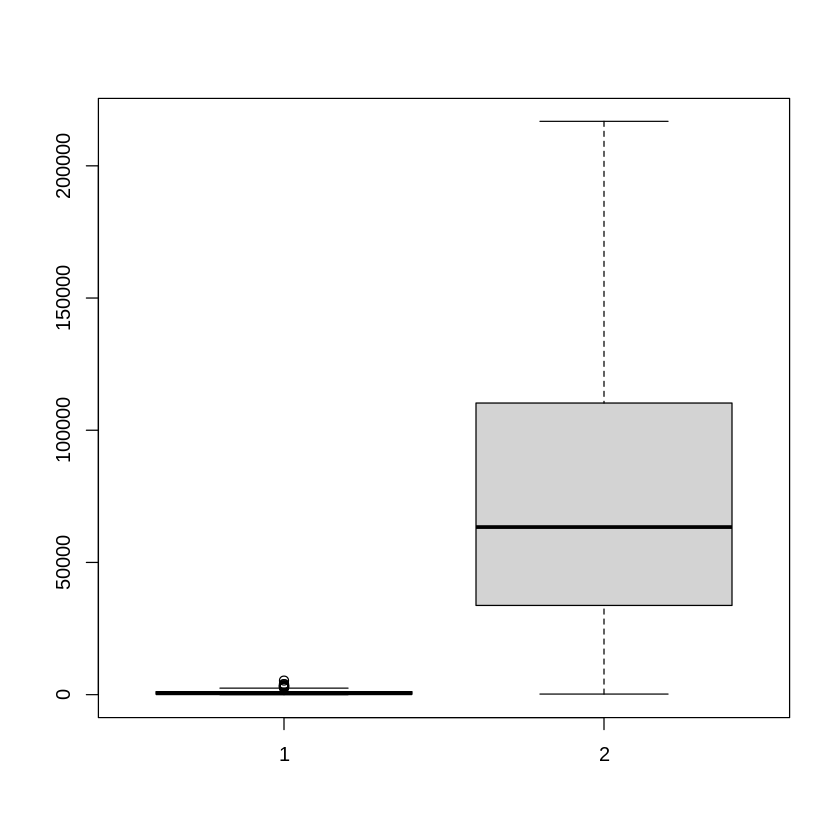

In [ ]:
boxplot(obs_spacing1, sim_spacing1)
cat("Maximum spacing of observed and simulated data are:", max(obs_spacing1), ",", max(sim_spacing1))
cat("\nMinimum spacing of observed and simulated data are:", min(obs_spacing1), ",", min(sim_spacing1))
cat("\nMedian spacing of observed and simulated data are:", median(obs_spacing1), ",", median(sim_spacing1))
cat("\nS.D spacing of observed and simulated data are:", sd(obs_spacing1), ",", sd(sim_spacing1))

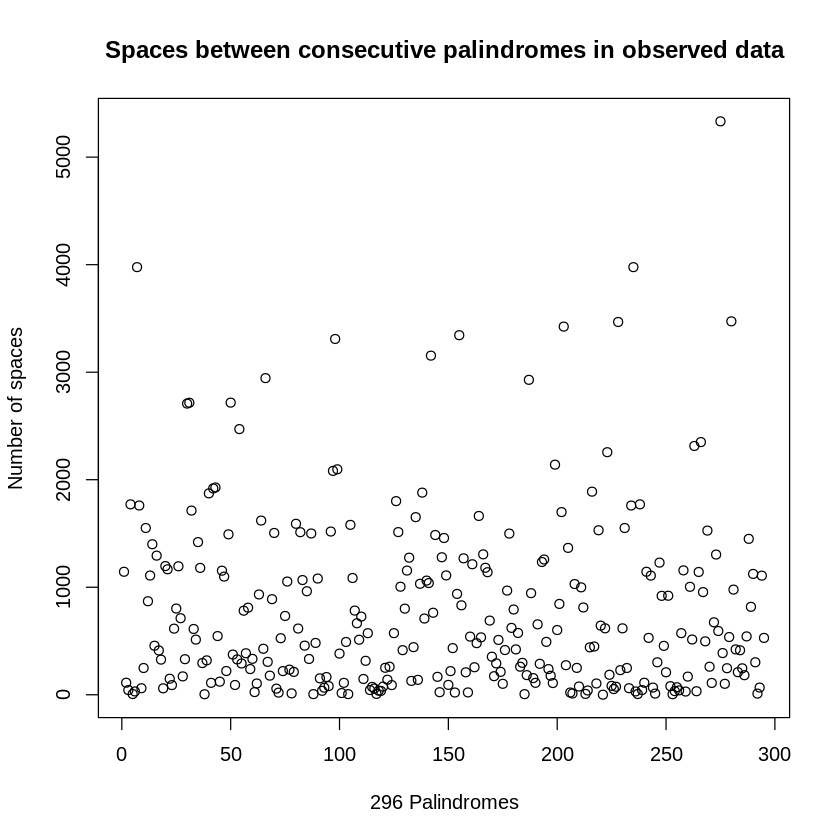

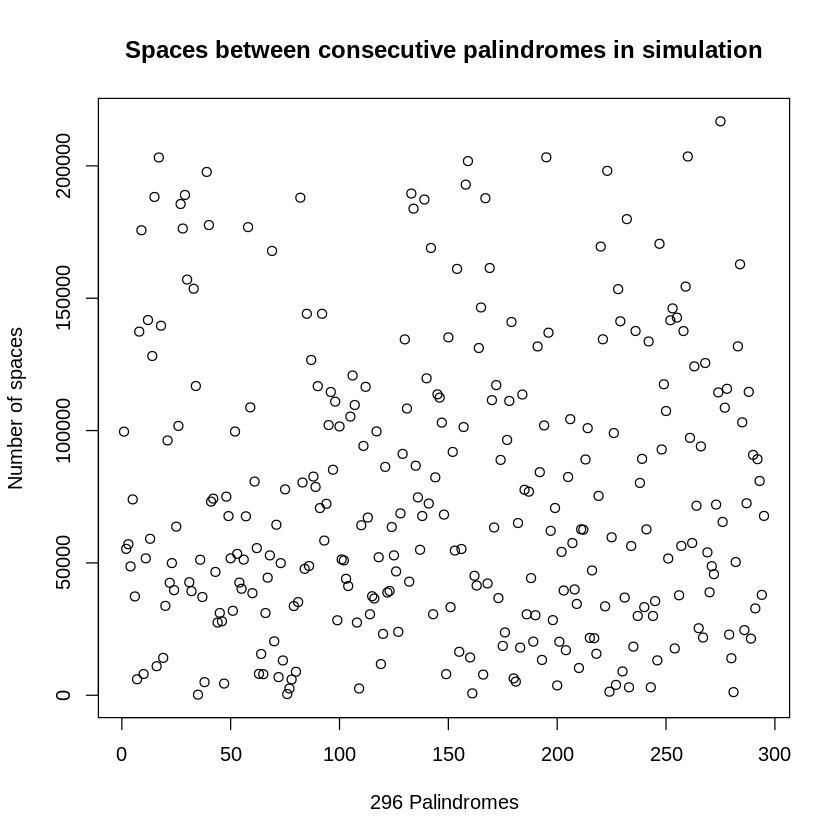

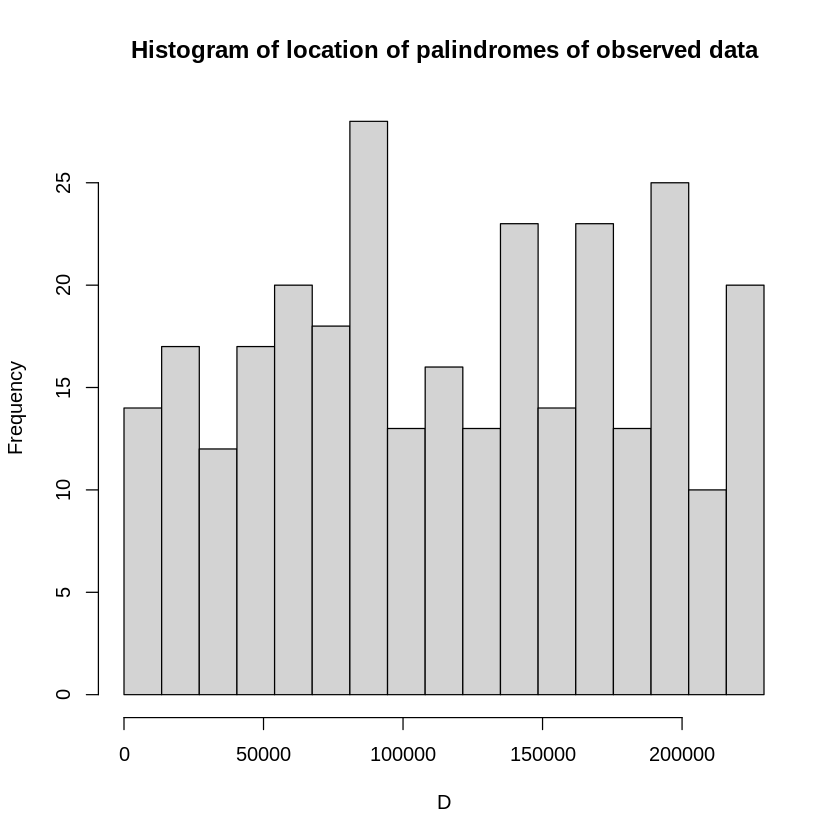

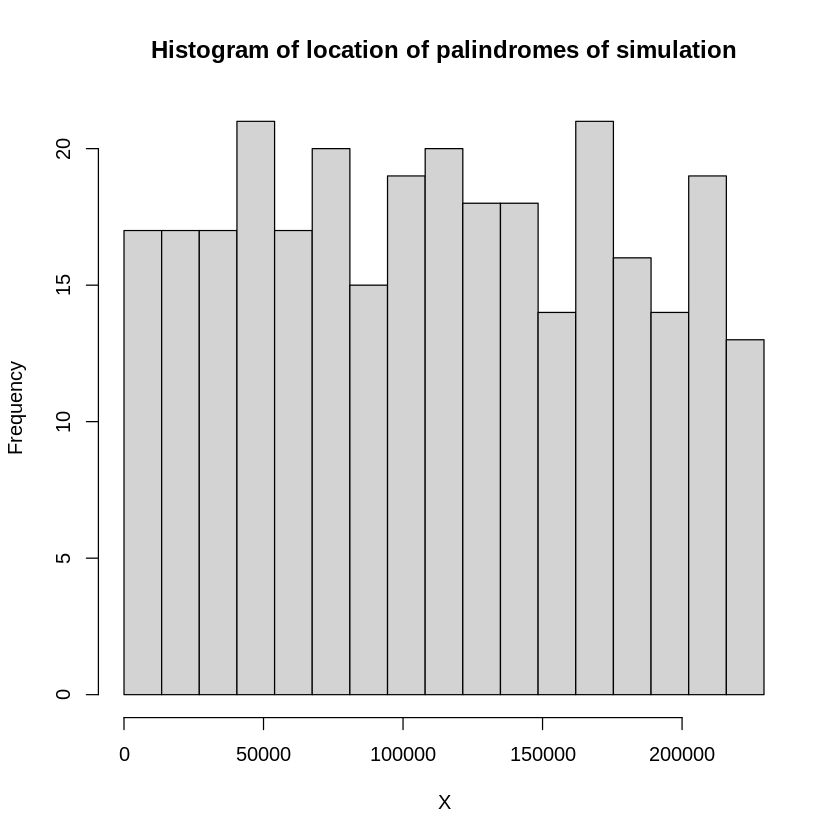

In [ ]:
M = 13492
plot(obs_spacing1, main = "Spaces between consecutive palindromes in observed data", 
xlab = "296 Palindromes", ylab = "Number of spaces")
plot(sim_spacing1, main = "Spaces between consecutive palindromes in simulation", 
xlab = "296 Palindromes", ylab = "Number of spaces")
hist(D, breaks = seq(0, L, by = M), main = "Histogram of location of palindromes of observed data")
hist(X, breaks = seq(0, L, by = M), main = "Histogram of location of palindromes of simulation")

Next, find the spacing between consecutive pairs

In [ ]:
#create vectors of pairs from observed data & simulation
obs_pairs = rep(NULL, n-1)
sim_pairs = rep(NULL, n-1)
for (i in 1:n-1){
  obs_pairs[i] = D[i] + D[i+1]
  sim_pairs[i] = X[i] + X[i+1]
}

#find spacing between consecutive pairs
obs_spacing2 = rep(NULL, n - 2)
sim_spacing2 = rep(NULL, n - 2)
for (i in 1:(n-2)){
  obs_spacing2[i] = abs(obs_pairs[i] - obs_pairs[i+1])
  sim_spacing2[i] = abs(sim_pairs[i] - sim_pairs[i+1])
}

obs_spacing2
sim_spacing2

[1] 1256  156 1815 1778   38 4008 5737 1821  310 1800 2421 1979 2509 1856 1750
 [16] 1706  739  387 1257 2364 1316  239  705 1417 1997 1907  883  502 3039 5424
 [31] 4429 2325 1125 1933 2600 1475  300  325 2193 1984 2030 3847 2474  668 1276
 [46] 2253 1320 1713 4209 3091  465  420 2800 2762 1073 1168 1196 1049  573  359
 [61]  130 1038 2553 2048 3373 3251  484 1067 2394 1562   77  546  746  953 1786
 [76] 1287  247  226 1803 2206 2128 2579 1524 1420 1296 1833 1506  488 1563 1234
 [91]  190  103  231  246 1599 3600 5391 5406 2480  399  127  602  497 1586 2666
[106] 1869 1448 1177 1239  874  463  889  617  117  131   66   46   74  112  327
[121]  391  401  351  663 2374 3314 2518 1420 1216 1956 2430 1404  572 2095 1791
[136] 1171 2912 2589 1771 2101 4193 3917 2249 1653  191 1303 2737 2568 1202  312
[151]  654  455  959 4282 4176 2101 1478  231  563 1755 1470  736 2143 2197 1840
[166] 2487 2321 1830 1044  527  465  802  723  315  518 1385 2468 2121 1415 1215
[181]  997  836  558  303  189 3112 3874 1100  266  766  943 1523 2493 1750  731
[196]  416  286 2249 2742 1447 2544 5123 3699 1641 1387   33 1042 1280  327 1076
[211] 1811  820   48  481 2330 2338  554 1635 2173  644  619 2874 2442  269  136
[226]  128 3542 3696  847 2169 1800  310 1821 5737 4008   38 1778 1815  156 1256
[241] 1673 1637 1175   78  313 1531 2149 1375  664 1130 1001   85   39  104  111
[256]  614 1730 1187  199 1173 1518 2828 2347 1175 3492 3305 1452 2024 1788  371
[271]  784 1978 1897 5926 5721  490  349  784 4010 4451 1400  632  624  660  428
[286]  725 1993 2268 1942 1426  313   78 1175 1637

[1] 154912   1754   8388  25313  36647  31317 143413  38281 183692  43690
 [11] 193479  82647 187287  60092 199240 192200  63562 125486  47902 130042
 [21]  53775   7438  10219 103412 165445  83837   9242  12673  31971 114334
 [31]   3381 114256  36747 116610  50983  88326  32151 202675  20070 104479
 [41] 147447  27689  74065  58557   3130  32381  70618   7350 119432  19833
 [51] 131548  46221  96001  82828  11006 118852 109251  68092 147338  42168
 [61] 136346  63689   7504  23554  23115  13346   8422 115024 147485  44038
 [71]  57553  56792  36774  64636  78247   3024   8521  39665  42598  44080
 [81] 152797 107600  32619  96357  95289 175517  44072 161310  38072  46055
 [91]  73408  85676 130782  29738  12502  29366  25730  82604 129884  50229
[101]    377  94943   2733 146555  15515  11147 137133  30042  61665  29966
[111]  22324  49386  97723   6836    875  63142  47549  63921  34970  63082
[121]  47458    590  24159  10718  99625  22821  92667  22484  43249  26106
[131] 151265 146624   5715  97113  11965  19787  12747 119564  67548  47304
[141]  96557 138375 112943 196010   1220 215469  34749  76227 143178 101911
[151] 125240 146613 106412 144657  71689 156593  91589   8884 187523  13568
[161]  44421   3675  89731  15314 138690 195596 145546 203647  49902  48124
[171]  53796 153902  52202  70272  42392  72720  14727  29831 134647   1215
[181]  59913  83071  95614  35987 108224  46324  32659  64532   9968 101538
[191]  47492  97642 115298 101287  66247  74867  33725  99142  67045  23942
[201]  74399  93742  22551  99487  21842  46812  17503  74489  44805  52388
[211]    131  26519  11831  79231  68832  68710   5865  91006  94204  35038
[221] 168083 164518 196769  61026 158738  95135 157351  12138 150294  45917
[231] 142971 176873  59398  38025 119248 107652 110179   9092  56017  29391
[241]  70986 136681  26940   5615  48750 157376  77704 210335  10103 159038
[251]  90015   4485 163846 124996 104909  18649  81170  16796  49157 106298
[261] 154768  66728  52633  46288  68697 115838 103699  71522  15093   9867
[271]  94514  26284 186445 102413 151349 174120   7144  92865  36909  12794
[281]  49144  81476  31005  59702  78494  47914  42091 136021  69406 123616
[291]  56377   8228 118896  29833

Maximum spacing of observed and simulated data are: 5926 , 215469
Minimum spacing of observed and simulated data are: 33 , 131
Median spacing of observed and simulated data are: 1386 , 63625.5
S.D spacing of observed and simulated data are: 1229.649 , 54104.78

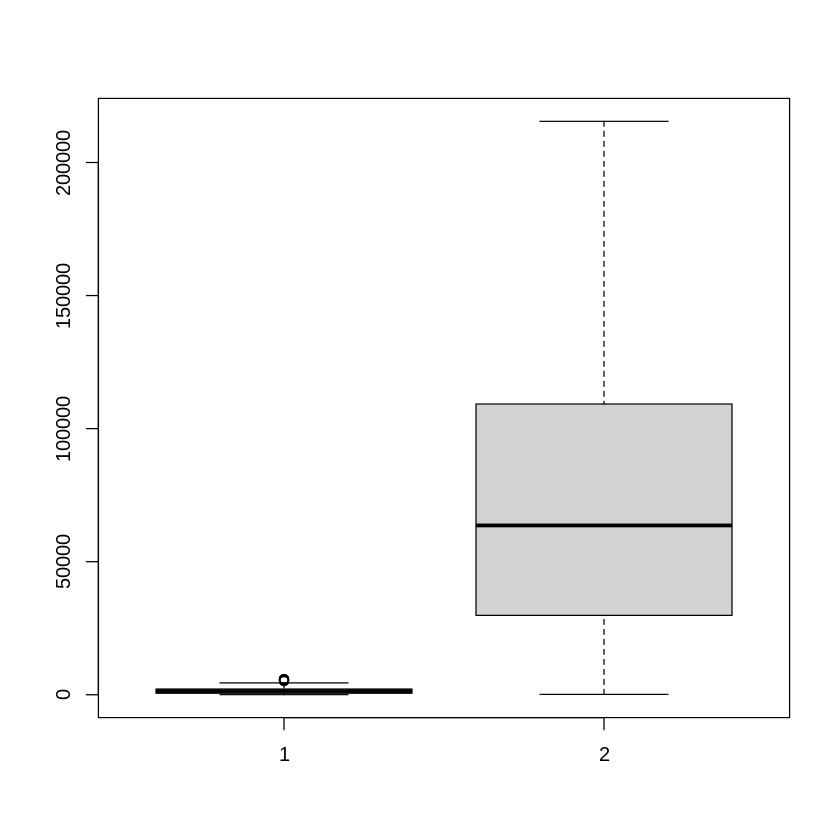

In [ ]:
boxplot(obs_spacing2, sim_spacing2)
cat("Maximum spacing of observed and simulated data are:", max(obs_spacing2), ",", max(sim_spacing2))
cat("\nMinimum spacing of observed and simulated data are:", min(obs_spacing2), ",", min(sim_spacing2))
cat("\nMedian spacing of observed and simulated data are:", median(obs_spacing2), ",", median(sim_spacing2))
cat("\nS.D spacing of observed and simulated data are:", sd(obs_spacing2), ",", sd(sim_spacing2))

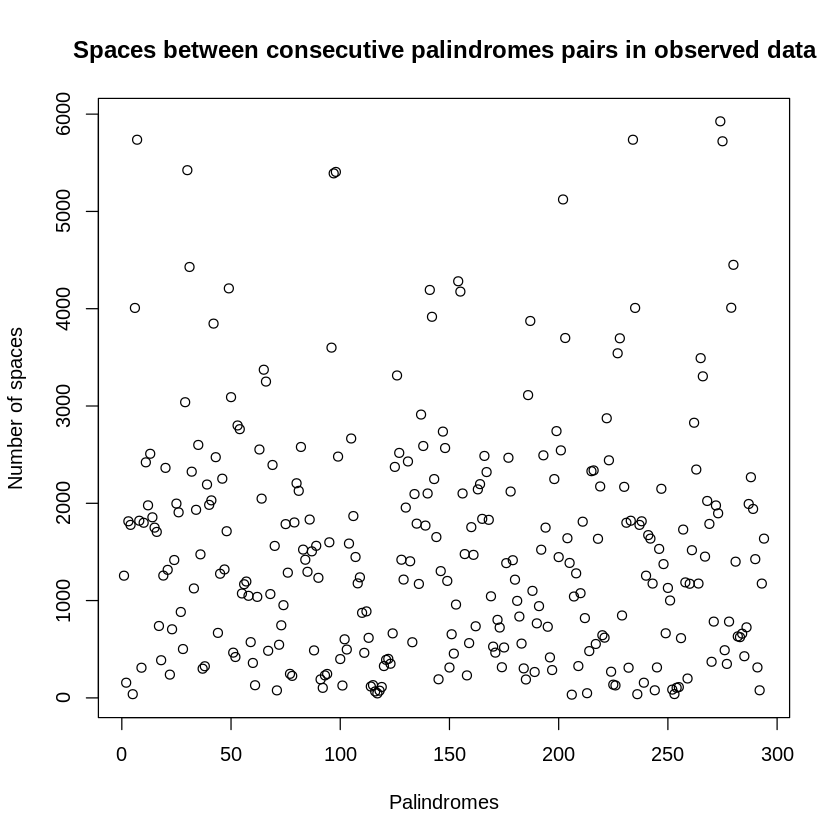

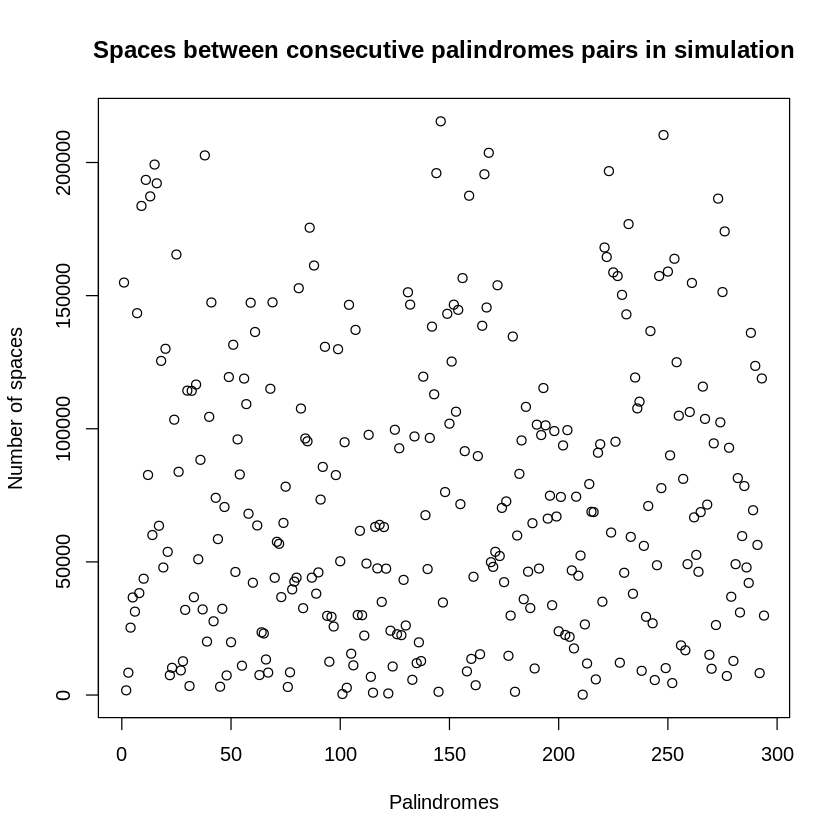

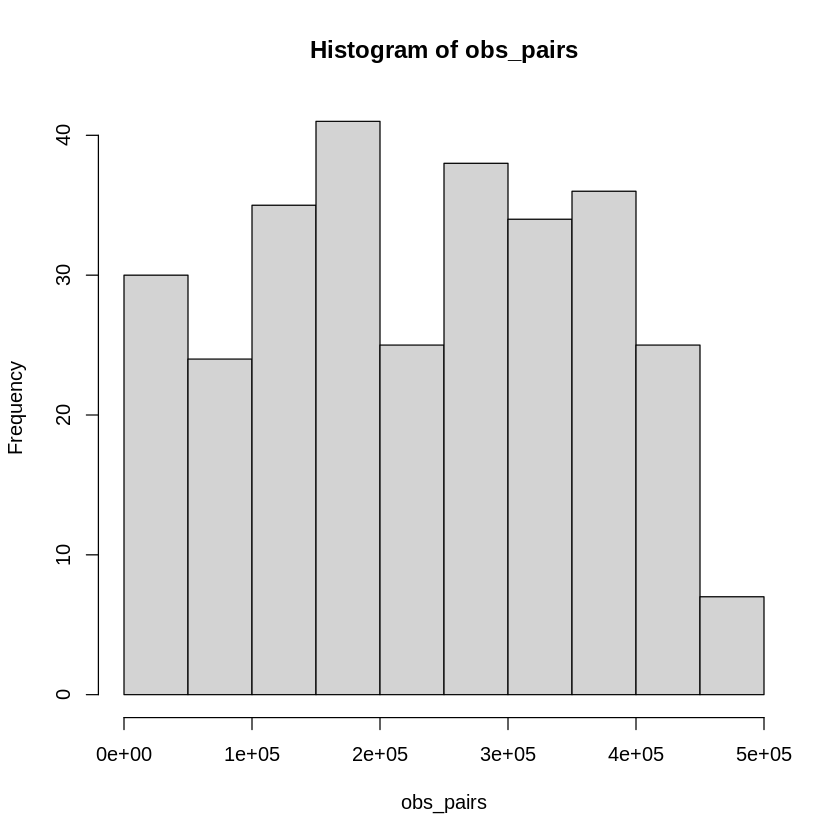

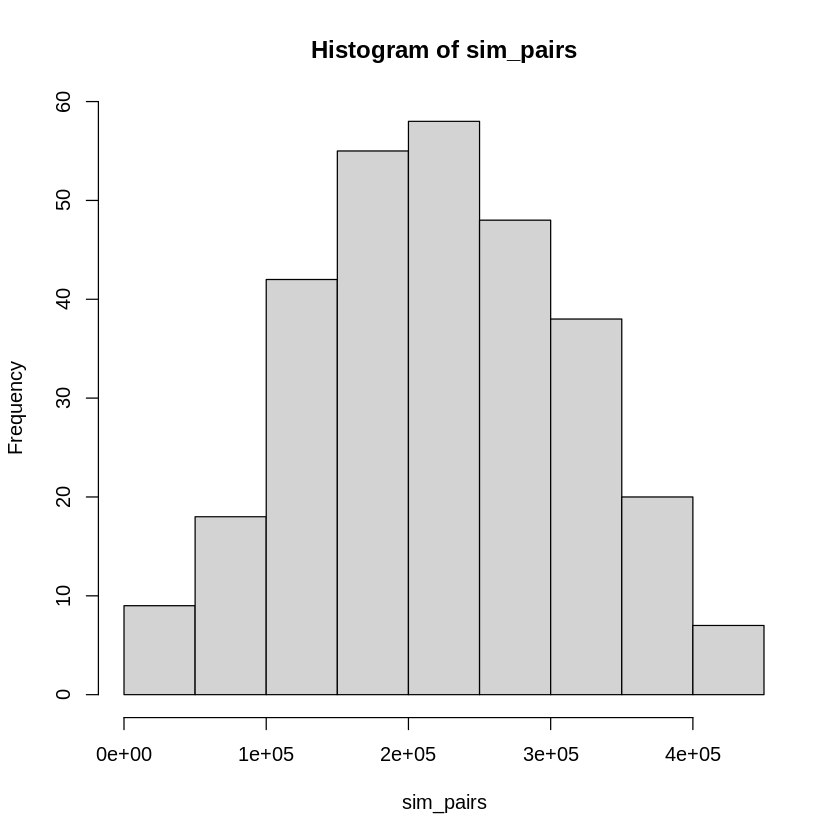

In [ ]:
plot(obs_spacing2, main = "Spaces between consecutive palindromes pairs in observed data", 
xlab = "Palindromes", ylab = "Number of spaces")
plot(sim_spacing2, main = "Spaces between consecutive palindromes pairs in simulation", 
xlab = "Palindromes", ylab = "Number of spaces")
hist(obs_pairs)
hist(sim_pairs)

Then, find the spacing between consecutive triplets

In [ ]:
#create vectors of triplets from observed data & simulation
obs_tri = rep(NULL, n-2)
sim_tri = rep(NULL, n-2)
for (i in 1:n-2){
  obs_tri[i] = D[i] + D[i+1] + D[i+2]
  sim_tri[i] = X[i] + X[i+1] + X[i+2]
}

#find spacing between consecutive triplets
obs_spacing3 = rep(NULL, n - 3)
sim_spacing3 = rep(NULL, n - 3)
for (i in 1:(n-3)){
  obs_spacing3[i] = abs(obs_tri[i] - obs_tri[i+1])
  sim_spacing3[i] = abs(sim_tri[i] - sim_tri[i+1])
}

obs_spacing3
sim_spacing3

[1] 1300 1927 1822 1809 4015 5768 5798 2070 1861 2670 3530 3379 2965 3150 2162
 [16] 2033  799 1584 2424 2513 1406  854 1507 2612 2709 2078 1214 3210 5755 7137
 [31] 5041 2838 2545 3113 2895 1480  620 2198 2304 3903 3958 4393 2596 1822 2375
 [46] 2474 2812 4430 4583 3182  794 2891 3091 3544 1459 1978 1435 1383  598  464
 [61] 1063 2658 2981 4993 3679 3429 1373 2572 2451 1582  603  766 1479 2006 2020
 [76] 1300  460 1816 2419 3718 3195 3036 2487 1753 2796 1839 1988 1569 1716 1271
 [91]  256  268  312 1764 3681 6909 7488 5789 2496  510  618  608 2077 2672 3449
[106] 2534 1960 1904 1386 1190 1036  933  690  175  139  104   82  150  363  467
[121]  652  491  924 2464 3887 4319 2933 2221 2371 3231 2559 1847 2224 2234 2823
[136] 3051 3621 3651 2810 5255 4956 5403 2416 1677 1470 2761 3847 2660 1422  746
[151]  675 1393 4303 5114 5445 2310 1500  772 1777 2011 1950 2399 2677 3503 3021
[166] 3627 3011 2184 1217  819  975 1015  825  731 1487 2884 3090 2914 1837 1790
[181] 1258 1133  564  486 3118 4057 4029 1211  921 1054 2178 2781 2985 1989  908
[196]  525 2426 2851 3587 3146 5968 5398 5065 1662 1399 1063 1292 1357 1326 1888
[211] 1819  860  489 2370 2779 2443 2084 2278 2174 1262 2875 3060 2525  322  211
[226] 3595 3771 4314 2398 2418 1861 2070 5798 5768 4015 1809 1822 1927 1300 1785
[241] 2781 1704 1186  380 1542 2451 2604 1584 1585 1210 1006  119  109  145  684
[256] 1771 1760 1356 1203 1687 3832 2861 3489 3525 4447 3802 2979 2285 1898 1045
[271] 2088 2571 7230 6314 5823  737  886 4257 4988 4873 1610 1046  870  842  971
[286] 2175 2811 3392 2244 1437  380 1186 1704

[1]  97845  46925  82380  12032  42675 106068  32253  46307 131976 185453
 [11] 134363  45524    976  71069   3937  52585  77691  91713 144171  87548
 [21] 103707  32275  53480 205158  20138  92504 198256 144370  74680 153662
 [31] 156965   2581  36974 167820  88099  83361 165559  25035  93231  30193
 [41] 100850    221 105154  30598   1292  42659   2928  44392  87523  79806
 [51]  78130   3638 136246  31577  78607  58000    491  29514  66592  97768
 [61] 144435  48096  15465   7522  21307  39498 159446  94641 211906  37170
 [71]   7629  43642 114560  65097  80810   8982  42228  48556  77787 143906
 [81]  72411 155367 176743  47522  31393  92907  34628  44538  32645 190180
 [91]  14959  13343  28711  84835  72705 140303   2603  18947  78562 101174
[101]  43621  53678 102557  25750  94143  16328 139700  34190  32533  86556
[111]  44812  18799  60300  29712 100565  11001  35769  87111  51302  24268
[121]  86862  62973  28686  36062  75666  45887   1475 111957  65086  16824
[131]  38289  37215  92441 171874  66939  87508 174538    173 139981 216294
[141]  65942  56047 226625  83548 101787 147211  26780 211436 109880   9969
[151] 179911  14470  89986  89394 173019  36326 110214   5396 188235  58701
[161]   2963 134864  56772   7501  49093 153359  15864  92139 113286 165304
[171]  90518  64978  33550  46532  54068  38467 126291  23460 139803  66284
[181]  77915  30545  17985   5392  31305   2064  12387  34292 121810  17252
[191]  34136 199584  87931  35695 128362 103257  37027  95435  46810  78106
[201] 113977  76715  59909   4815  35648  86799  16999  84792  17886  10172
[211]  89210  74391   9848  32078  90389  53018  69449  78512  40276   1435
[221]  30038 163166 137095 160090 154809  58287  16067   3128 187201 133961
[231] 139966 120480  41030 175641  89284  27437  20872  24198 118698 104276
[241]  74000 106727   8629  18796 121807  64523  39778 102956  41556  17364
[251]  56144  22172  21163  87222 161332 118944  73219 186750  48091  48778
[261]  30520   4887  77960 140312  90511   9675  49708 110420  63858  55616
[271]  22481 140696  30380  36937  42705  58332  15779  78879  35717  63130
[281]  82668  81341  72110  84323 151029  66712  63486  45220 102221  34424
[291]  24587  29704  51131

Maximum spacing of observed and simulated data are: 7488 , 226625
Minimum spacing of observed and simulated data are: 82 , 173
Median spacing of observed and simulated data are: 2078 , 63130
S.D spacing of observed and simulated data are: 1472.145 , 52534.59

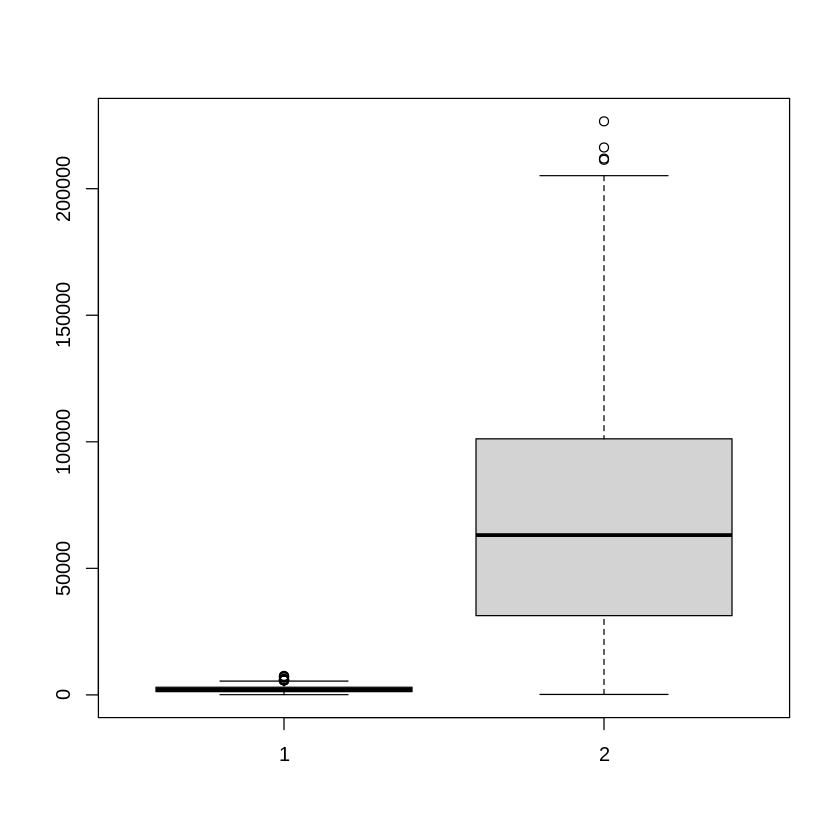

In [ ]:
boxplot(obs_spacing3, sim_spacing3)
cat("Maximum spacing of observed and simulated data are:", max(obs_spacing3), ",", max(sim_spacing3))
cat("\nMinimum spacing of observed and simulated data are:", min(obs_spacing3), ",", min(sim_spacing3))
cat("\nMedian spacing of observed and simulated data are:", median(obs_spacing3), ",", median(sim_spacing3))
cat("\nS.D spacing of observed and simulated data are:", sd(obs_spacing3), ",", sd(sim_spacing3))

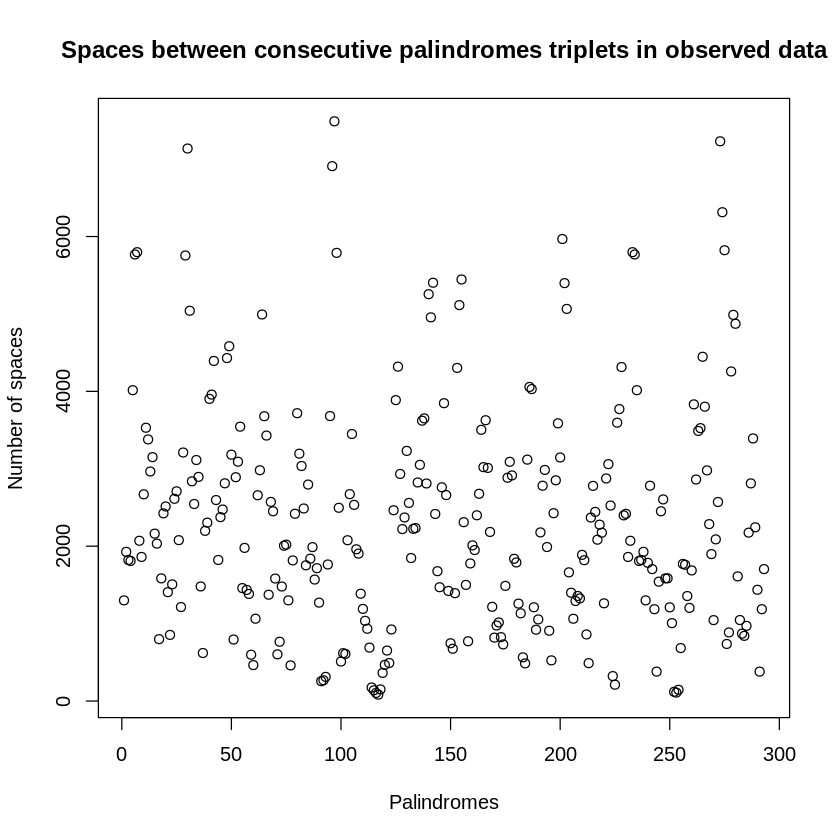

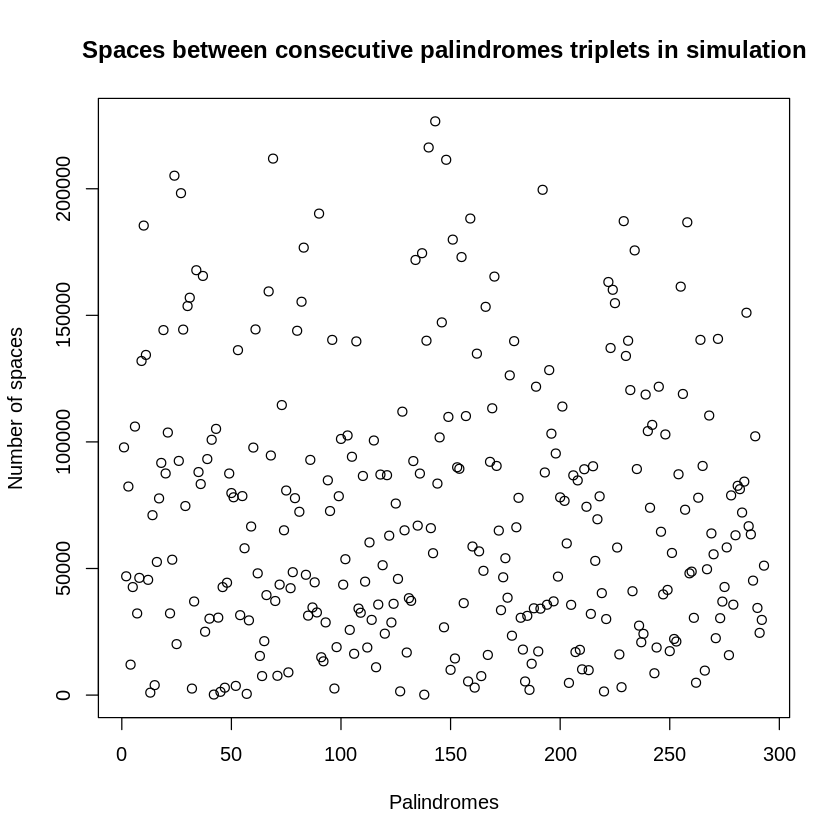

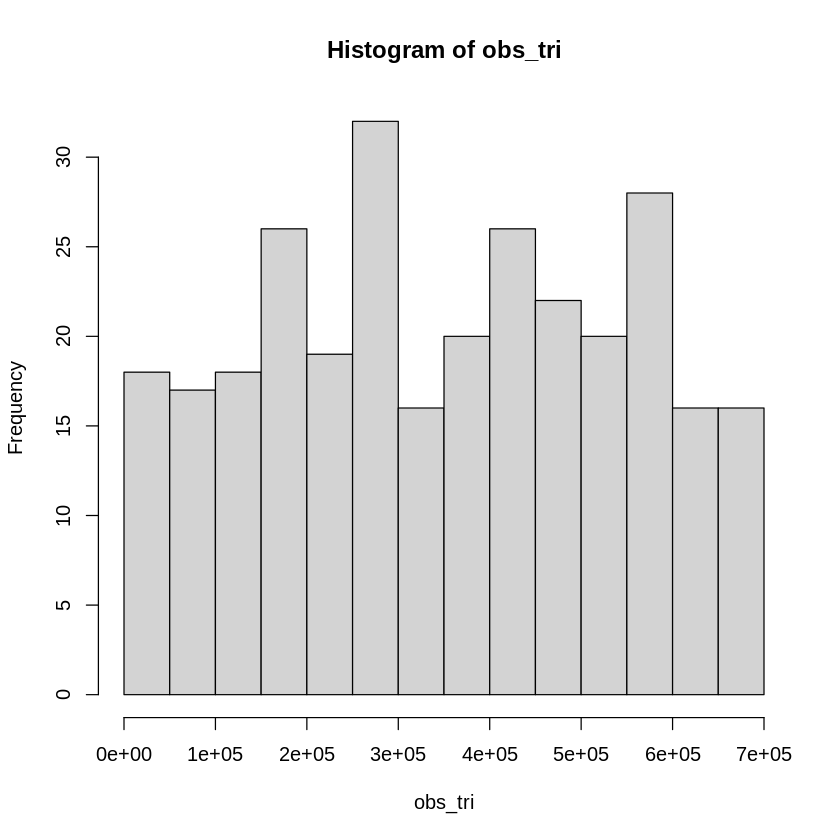

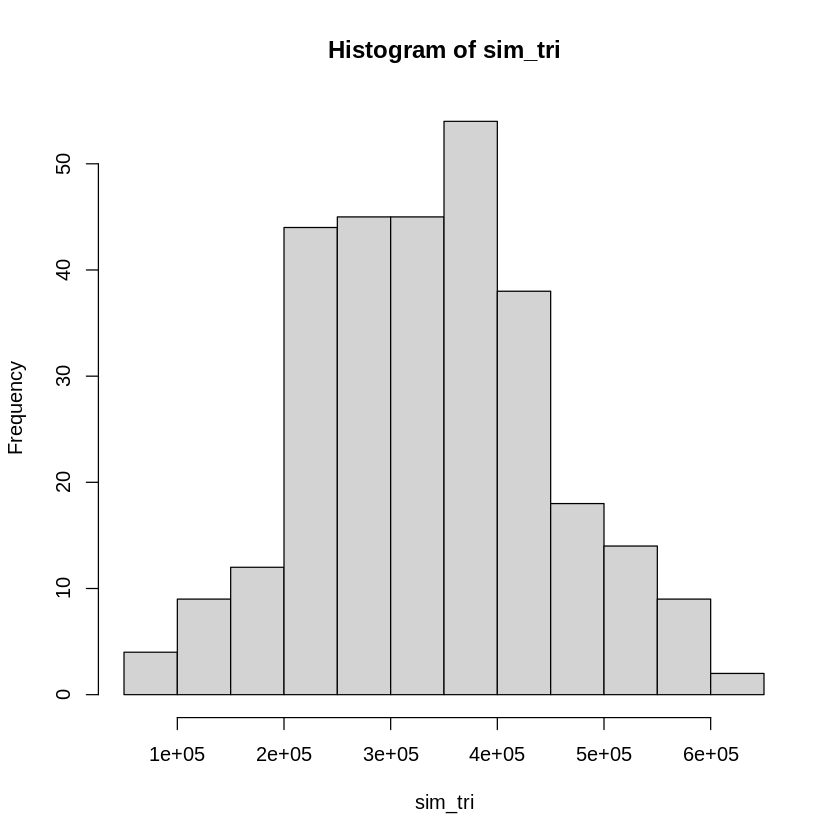

In [ ]:
plot(obs_spacing3, main = "Spaces between consecutive palindromes triplets in observed data", 
xlab = "Palindromes", ylab = "Number of spaces")
plot(sim_spacing3, main = "Spaces between consecutive palindromes triplets in simulation", 
xlab = "Palindromes", ylab = "Number of spaces")
hist(obs_tri)
hist(sim_tri)

# Adding noise to data and Chi-square test

In [ ]:
# create a uniform random scatter similar to Q1
# this is just to repeat the finding of the 'expected' value

L = 229364 # the DNA sequence of CMV is 229354 letters long
n = 296 # the amount of observations (palindromes) we have
# X = sample(1:L, size = n, replace = F)
# how big to make one bin? Arbitrarily I will choose 13492, as L is divisible by that
M = 13492
# X.hist = hist(X, breaks = seq(0, L, by = M))
m = L/M
expected = n/m

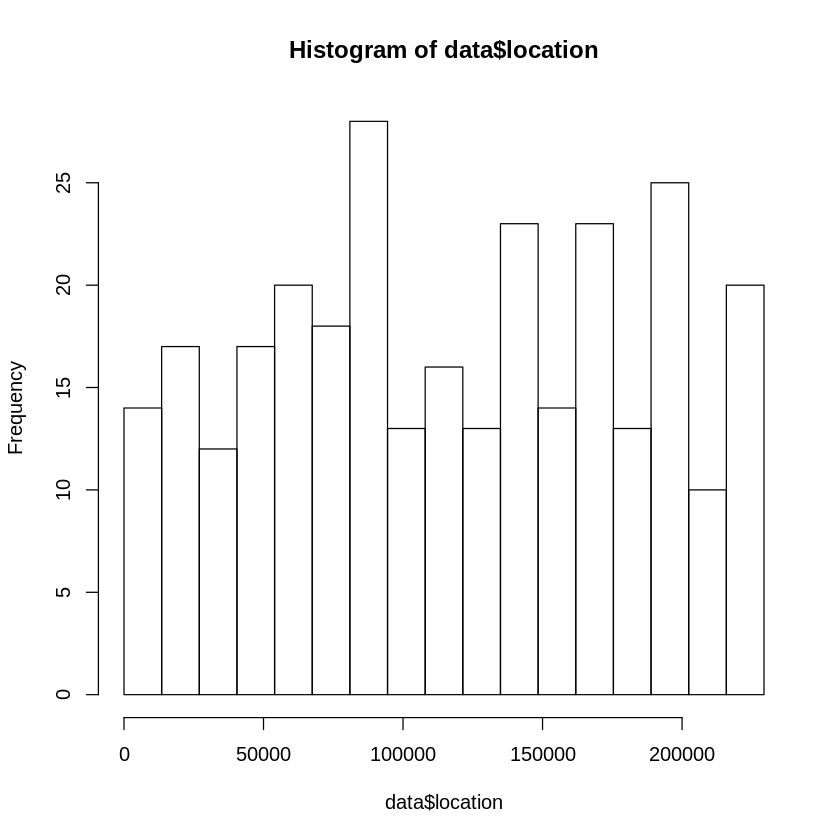

In [ ]:
# see the observed data histogram again

plot(D.hist)

In [ ]:
# bar heights of the simulated histogram. This won't be used.
# X.hist$counts

In [ ]:
# bar heights of the observed data histogram
D.hist$counts

[1] 14 17 12 17 20 18 28 13 16 13 23 14 23 13 25 10 20

In [ ]:
# comparing our observed data histogram bar heights to
# the expected value of a uniform distribution
# referenced from Chapter 4 lecture

chi_square_stat = sum((D.hist$counts - expected)^2/expected)
chi_square_stat

[1] 23.78378

In [ ]:
p_value = 1 - pchisq(chi_square_stat, df = m-1)
p_value

[1] 0.09433441

Note: So with this method, we get a p-value of 0.094, which may be too high to some.

What if we made our bins smaller (thus making counts more variable)?

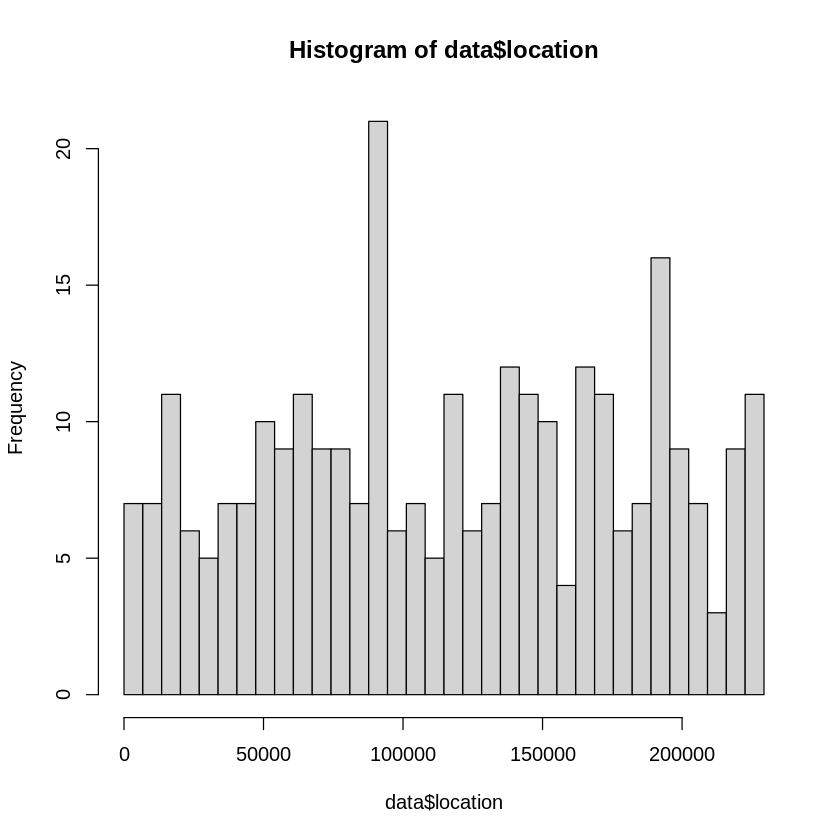

In [ ]:
# bin size will be halved
M_halved = M/2
D.hist.double_bins = hist(data$location, breaks = seq(0, L, by = M_halved))
# number of bins is therefore doubled
m_doubled = L/M_halved

In [ ]:
D.hist.double_bins

$breaks
 [1]      0   6746  13492  20238  26984  33730  40476  47222  53968  60714
[11]  67460  74206  80952  87698  94444 101190 107936 114682 121428 128174
[21] 134920 141666 148412 155158 161904 168650 175396 182142 188888 195634
[31] 202380 209126 215872 222618 229364

$counts
 [1]  7  7 11  6  5  7  7 10  9 11  9  9  7 21  6  7  5 11  6  7 12 11 10  4 12
[26] 11  6  7 16  9  7  3  9 11

$density
 [1] 3.505581e-06 3.505581e-06 5.508770e-06 3.004784e-06 2.503986e-06
 [6] 3.505581e-06 3.505581e-06 5.007973e-06 4.507175e-06 5.508770e-06
[11] 4.507175e-06 4.507175e-06 3.505581e-06 1.051674e-05 3.004784e-06
[16] 3.505581e-06 2.503986e-06 5.508770e-06 3.004784e-06 3.505581e-06
[21] 6.009567e-06 5.508770e-06 5.007973e-06 2.003189e-06 6.009567e-06
[26] 5.508770e-06 3.004784e-06 3.505581e-06 8.012756e-06 4.507175e-06
[31] 3.505581e-06 1.502392e-06 4.507175e-06 5.508770e-06

$mids
 [1]   3373  10119  16865  23611  30357  37103  43849  50595  57341  64087
[11]  70833  77579  84325  91071  978

In [ ]:
# Doubling the bins also halves the expected value
# this is the same simulation, but the bins are doubled
# X.hist = hist(X, breaks = seq(0, L, by = M_halved))
expected_halved = n/m_doubled

In [ ]:
expected_halved

[1] 8.705882

In [ ]:
chi_square_stat = sum((D.hist.double_bins$counts - expected_halved)^2/expected_halved)
chi_square_stat

[1] 45.83784

In [ ]:
p_value = 1 - pchisq(chi_square_stat, df = m_doubled-1)
p_value

[1] 0.06786499

Concluding Note: The p-value has shrunk to 0.068 after doubling our number of bins. It's still a bit high, but whether to reject or not is up to us.

Test for verious interval size: 500, 1000, 2000, 4000, 8000, 10000, 20000, 30000, 40000

We used interval size of 13492 in Q1

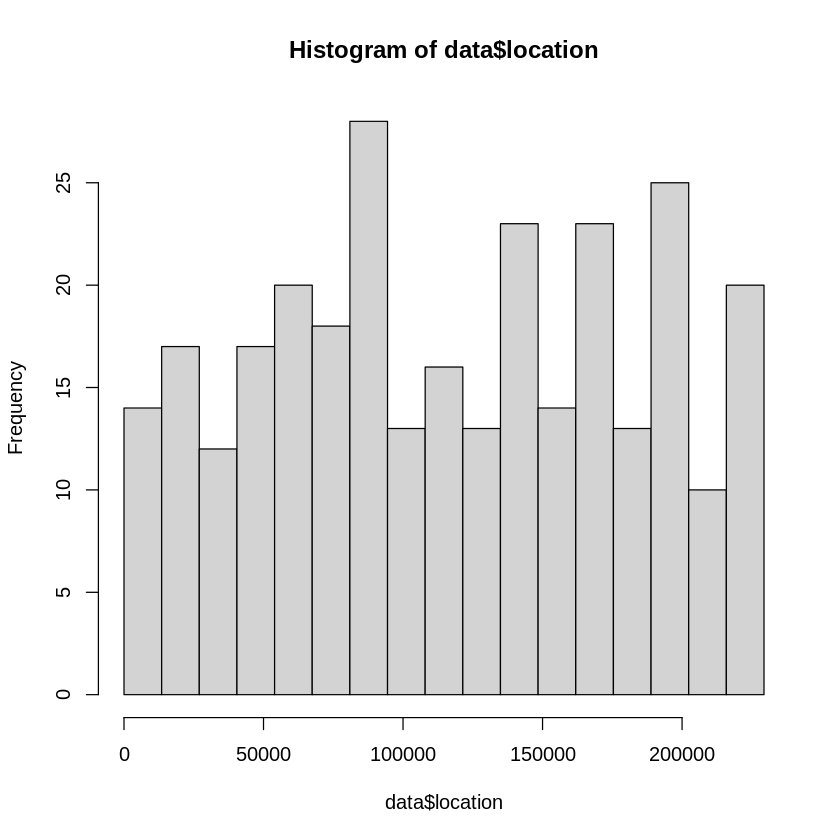

In [ ]:
#RECAP, THIS IS WHAT WE DID IN Q1
L = 229364 # the DNA sequence of CMV is 229354 letters long
n = 296 # the amount of observations (palindromes) we have
# how big to make one bin? Arbitrarily I will choose 13492, as L is divisible by that
M = 13492
D.hist = hist(data$location, breaks = seq(0, L, by = M))

In [ ]:
#lets find the subinterval with the most palindrome count
max_count = max(D.hist$counts)
cat("The maximum count of palindrome in a subinterval is:", max_count)
index_interval_lower_bound = which(D.hist$counts %in% c(max_count))
index_interval_upper_bound = index_interval_lower_bound + 1
interval_lower_bound = D.hist$breaks[index_interval_lower_bound]
interval_upper_bound = D.hist$breaks[index_interval_upper_bound]
cat("\nThe subinterval with most palindrome count is: [", interval_lower_bound, interval_upper_bound, "]")

The maximum count of palindrome in a subinterval is: 28
The subinterval with most palindrome count is: [ 80952 94444 ]

The maximum count of palindrome in a subinterval is: 8
The subinterval with most palindrome count is: [ 92500 93000 ]

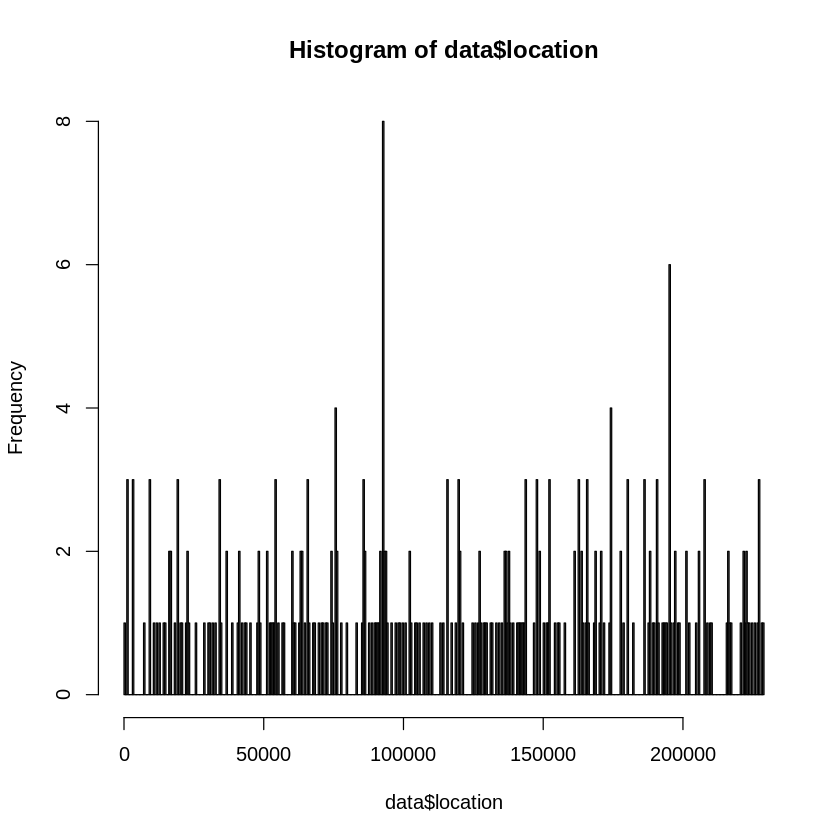

In [ ]:
#Interval size of 500
M = 500
D.hist = hist(data$location, breaks = seq(0, L, by = M))

max_count = max(D.hist$counts)
cat("The maximum count of palindrome in a subinterval is:", max_count)
index_interval_lower_bound = which(D.hist$counts %in% c(max_count))
index_interval_upper_bound = index_interval_lower_bound + 1
interval_lower_bound = D.hist$breaks[index_interval_lower_bound]
interval_upper_bound = D.hist$breaks[index_interval_upper_bound]
cat("\nThe subinterval with most palindrome count is: [", interval_lower_bound, interval_upper_bound, "]")

The maximum count of palindrome in a subinterval is: 8
The subinterval with most palindrome count is: [ 92000 93000 ]

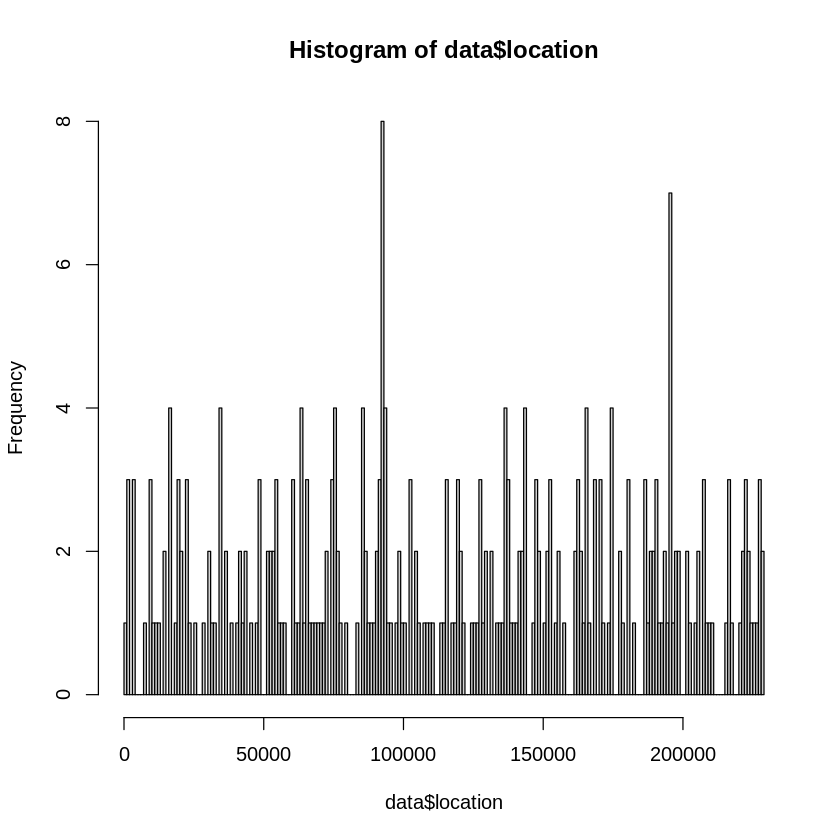

In [ ]:
#Interval size of 1000
M = 1000
D.hist = hist(data$location, breaks = seq(0, L, by = M))

max_count = max(D.hist$counts)
cat("The maximum count of palindrome in a subinterval is:", max_count)
index_interval_lower_bound = which(D.hist$counts %in% c(max_count))
index_interval_upper_bound = index_interval_lower_bound + 1
interval_lower_bound = D.hist$breaks[index_interval_lower_bound]
interval_upper_bound = D.hist$breaks[index_interval_upper_bound]
cat("\nThe subinterval with most palindrome count is: [", interval_lower_bound, interval_upper_bound, "]")

The maximum count of palindrome in a subinterval is: 12
The subinterval with most palindrome count is: [ 92000 94000 ]

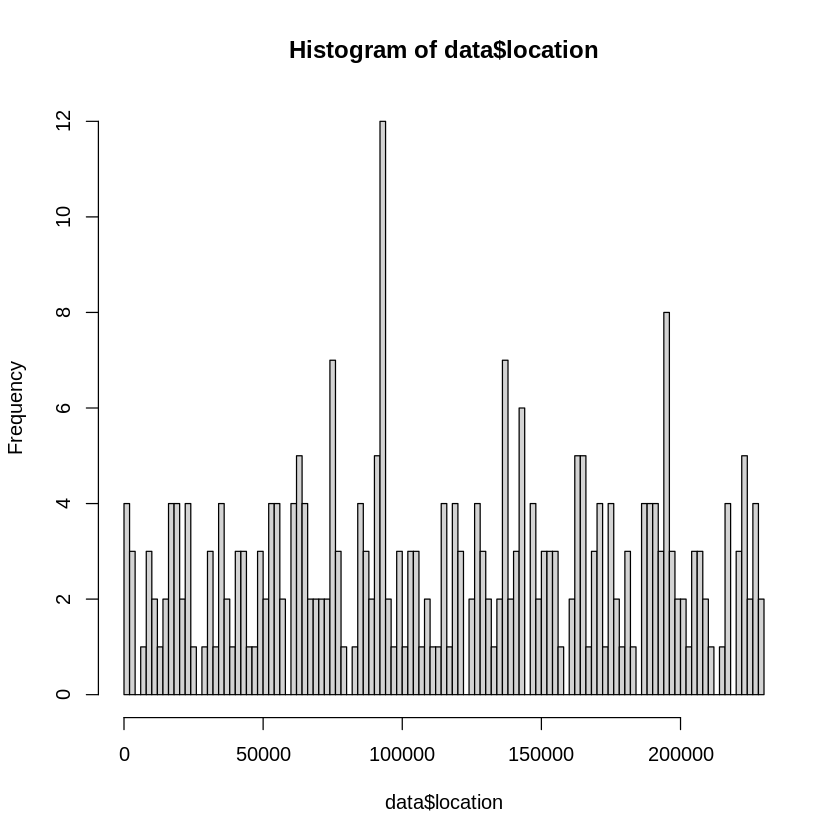

In [ ]:
#Interval size of 2000
M = 2000
D.hist = hist(data$location, breaks = seq(0, L+M, by = M)) #need to +M here because without that some values will fall outside the range

max_count = max(D.hist$counts)
cat("The maximum count of palindrome in a subinterval is:", max_count)
index_interval_lower_bound = which(D.hist$counts %in% c(max_count))
index_interval_upper_bound = index_interval_lower_bound + 1
interval_lower_bound = D.hist$breaks[index_interval_lower_bound]
interval_upper_bound = D.hist$breaks[index_interval_upper_bound]
cat("\nThe subinterval with most palindrome count is: [", interval_lower_bound, interval_upper_bound, "]")

The maximum count of palindrome in a subinterval is: 14
The subinterval with most palindrome count is: [ 92000 96000 ]

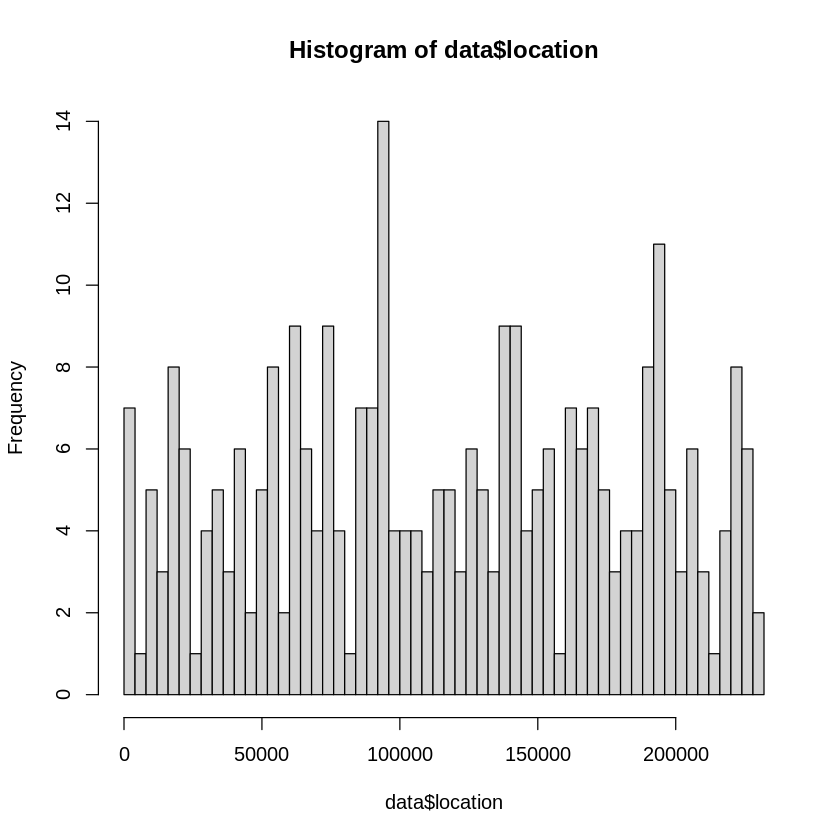

In [ ]:
#Interval size of 4000
M = 4000
D.hist = hist(data$location, breaks = seq(0, L+M, by = M)) #need to +M here because without that some values will fall outside the range

max_count = max(D.hist$counts)
cat("The maximum count of palindrome in a subinterval is:", max_count)
index_interval_lower_bound = which(D.hist$counts %in% c(max_count))
index_interval_upper_bound = index_interval_lower_bound + 1
interval_lower_bound = D.hist$breaks[index_interval_lower_bound]
interval_upper_bound = D.hist$breaks[index_interval_upper_bound]
cat("\nThe subinterval with most palindrome count is: [", interval_lower_bound, interval_upper_bound, "]")

The maximum count of palindrome in a subinterval is: 21
The subinterval with most palindrome count is: [ 88000 96000 ]

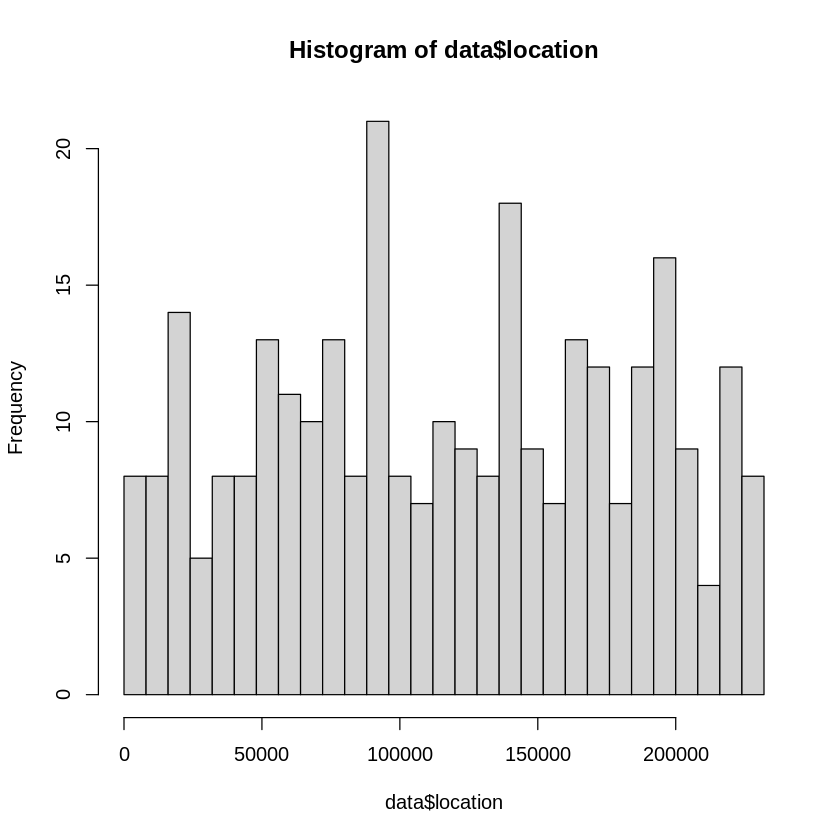

In [ ]:
#Interval size of 8000
M = 8000
D.hist = hist(data$location, breaks = seq(0, L+M, by = M)) #need to +M here because without that some values will fall outside the range

max_count = max(D.hist$counts)
cat("The maximum count of palindrome in a subinterval is:", max_count)
index_interval_lower_bound = which(D.hist$counts %in% c(max_count))
index_interval_upper_bound = index_interval_lower_bound + 1
interval_lower_bound = D.hist$breaks[index_interval_lower_bound]
interval_upper_bound = D.hist$breaks[index_interval_upper_bound]
cat("\nThe subinterval with most palindrome count is: [", interval_lower_bound, interval_upper_bound, "]")

The maximum count of palindrome in a subinterval is: 23
The subinterval with most palindrome count is: [ 90000 1e+05 ]

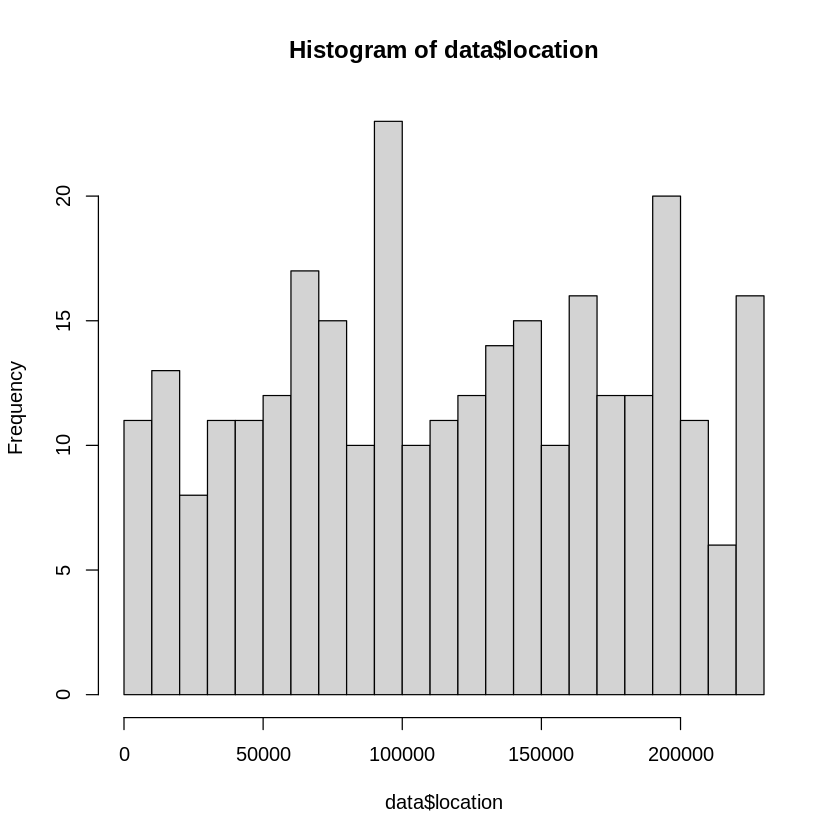

In [ ]:
#Interval size of 10000
M = 10000
D.hist = hist(data$location, breaks = seq(0, L+M, by = M)) #need to +M here because without that some values will fall outside the range

max_count = max(D.hist$counts)
cat("The maximum count of palindrome in a subinterval is:", max_count)
index_interval_lower_bound = which(D.hist$counts %in% c(max_count))
index_interval_upper_bound = index_interval_lower_bound + 1
interval_lower_bound = D.hist$breaks[index_interval_lower_bound]
interval_upper_bound = D.hist$breaks[index_interval_upper_bound]
cat("\nThe subinterval with most palindrome count is: [", interval_lower_bound, interval_upper_bound, "]")

The maximum count of palindrome in a subinterval is: 33
The subinterval with most palindrome count is: [ 80000 1e+05 ]

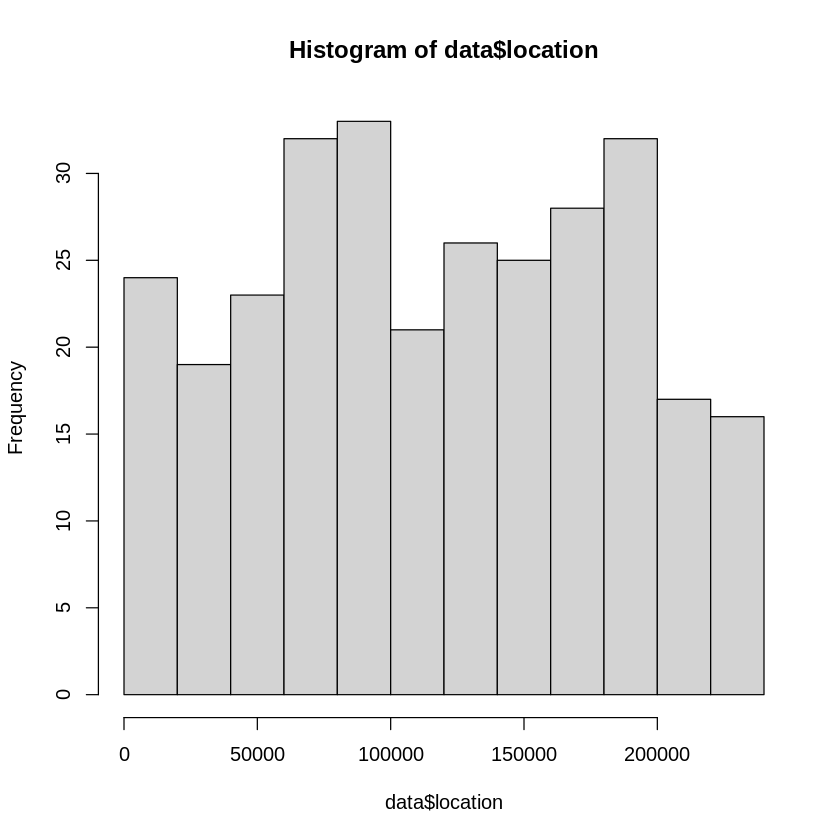

In [ ]:
#Interval size of 20000
M = 20000
D.hist = hist(data$location, breaks = seq(0, L+M, by = M)) #need to +M here because without that some values will fall outside the range

max_count = max(D.hist$counts)
cat("The maximum count of palindrome in a subinterval is:", max_count)
index_interval_lower_bound = which(D.hist$counts %in% c(max_count))
index_interval_upper_bound = index_interval_lower_bound + 1
interval_lower_bound = D.hist$breaks[index_interval_lower_bound]
interval_upper_bound = D.hist$breaks[index_interval_upper_bound]
cat("\nThe subinterval with most palindrome count is: [", interval_lower_bound, interval_upper_bound, "]")

The maximum count of palindrome in a subinterval is: 44
The subinterval with most palindrome count is: [ 90000 120000 ]

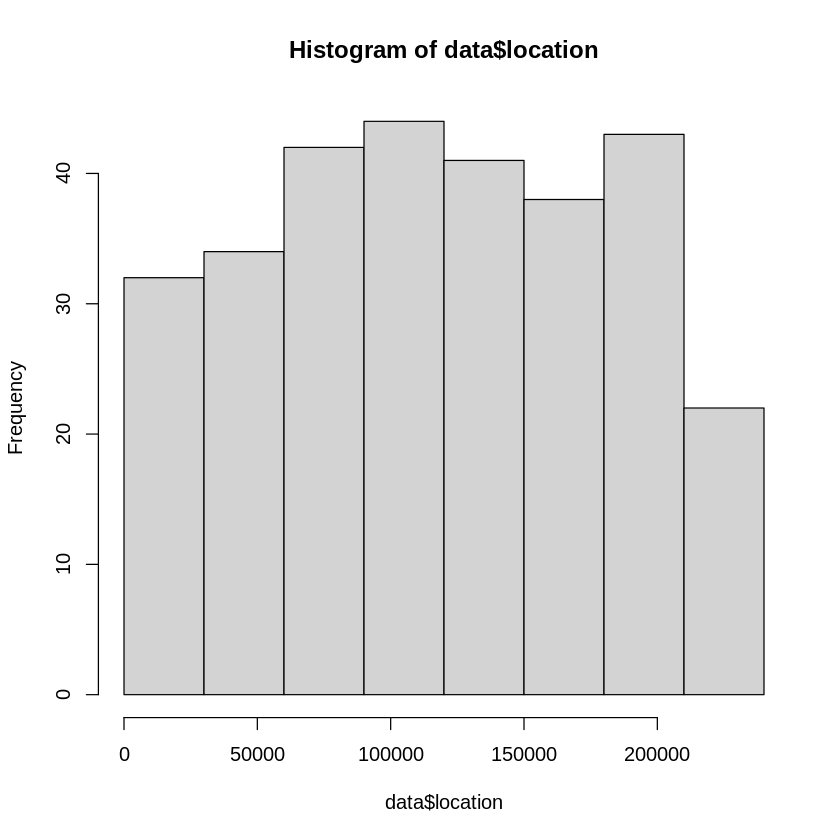

In [ ]:
#Interval size of 30000
M = 30000
D.hist = hist(data$location, breaks = seq(0, L+M, by = M)) #need to +M here because without that some values will fall outside the range

max_count = max(D.hist$counts)
cat("The maximum count of palindrome in a subinterval is:", max_count)
index_interval_lower_bound = which(D.hist$counts %in% c(max_count))
index_interval_upper_bound = index_interval_lower_bound + 1
interval_lower_bound = D.hist$breaks[index_interval_lower_bound]
interval_upper_bound = D.hist$breaks[index_interval_upper_bound]
cat("\nThe subinterval with most palindrome count is: [", interval_lower_bound, interval_upper_bound, "]")

The maximum count of palindrome in a subinterval is: 60
The subinterval with most palindrome count is: [ 160000 2e+05 ]

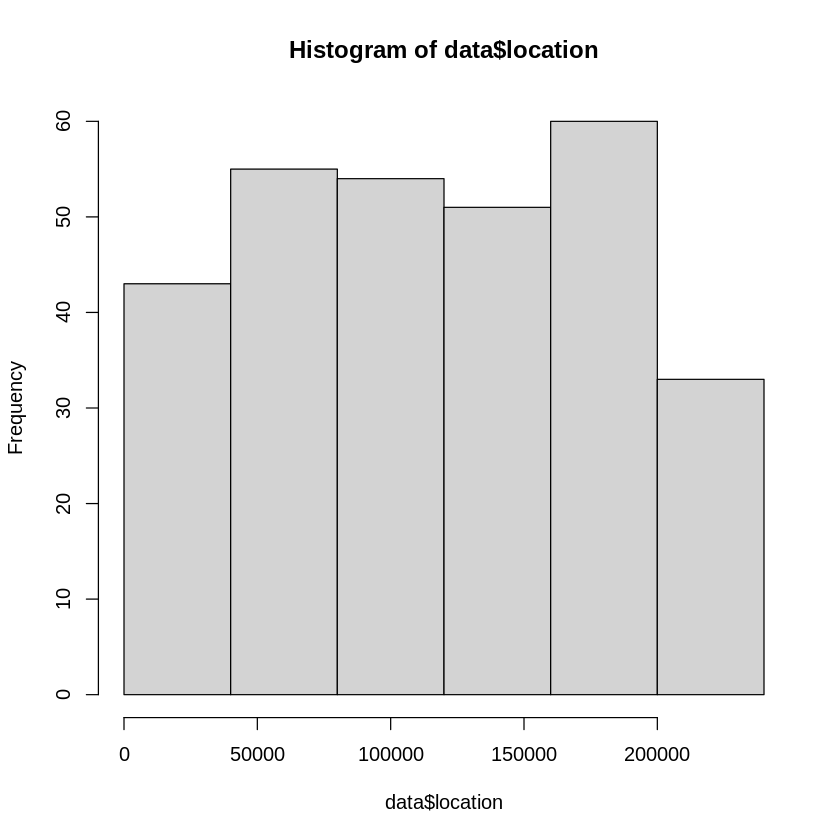

In [ ]:
#Interval size of 40000
M = 40000
D.hist = hist(data$location, breaks = seq(0, L+M, by = M)) #need to +M here because without that some values will fall outside the range

max_count = max(D.hist$counts)
cat("The maximum count of palindrome in a subinterval is:", max_count)
index_interval_lower_bound = which(D.hist$counts %in% c(max_count))
index_interval_upper_bound = index_interval_lower_bound + 1
interval_lower_bound = D.hist$breaks[index_interval_lower_bound]
interval_upper_bound = D.hist$breaks[index_interval_upper_bound]
cat("\nThe subinterval with most palindrome count is: [", interval_lower_bound, interval_upper_bound, "]")

The maximum count of palindrome in a subinterval is: 77
The subinterval with most palindrome count is: [ 50000 1e+05 ]

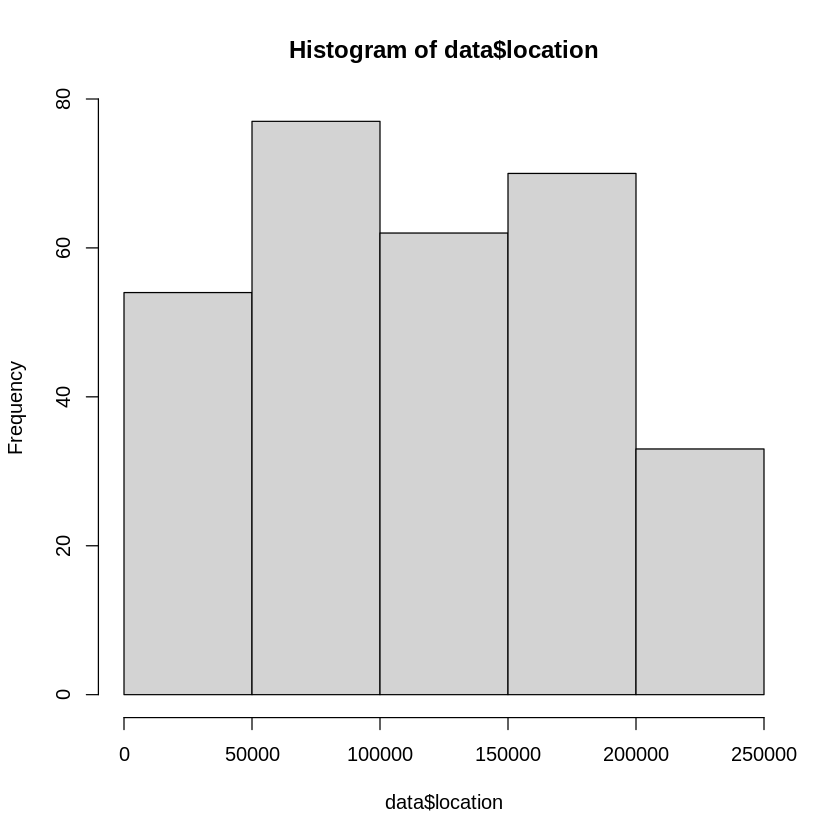

In [ ]:
#Interval size of 50000
M = 50000
D.hist = hist(data$location, breaks = seq(0, L+M, by = M)) #need to +M here because without that some values will fall outside the range

max_count = max(D.hist$counts)
cat("The maximum count of palindrome in a subinterval is:", max_count)
index_interval_lower_bound = which(D.hist$counts %in% c(max_count))
index_interval_upper_bound = index_interval_lower_bound + 1
interval_lower_bound = D.hist$breaks[index_interval_lower_bound]
interval_upper_bound = D.hist$breaks[index_interval_upper_bound]
cat("\nThe subinterval with most palindrome count is: [", interval_lower_bound, interval_upper_bound, "]")

Conclusion: For visual purpose, generally we go for 10-20 bins, so we can stick to our original interval of M = 13492 with 17 bins. To narrow down the subinterval size, we use a smaller interval size, and found that the subinterval with most palindrome count occurs at [92000, 96000] with interval size of 4000. This is consistent with 10 out of 11 of the sample interval sizes, giving a percentage of 90.9%. The interval size 40000 is the only interval size that has shown different subinterval with the most palindrome count, which is [160000, 200000]. We consider this as an acceptable result as the second most palindrome count falls into this range

In [ ]:
#so now we suspect that there is a potential origin of replication at the interval [92000, 96000]
#assign weightage for these intervals with the most palindrome counts
#refer to discussion 5 notes, e.g. assign them 10 times the likelihood of being selected for the 296 palindrome sites

In [ ]:
library(lattice)

In [ ]:
L = 229364 # the DNA sequence of CMV is 229354 letters long
n = 296 # the amount of observations (palindromes) we have
M = 13492
cmv_sequence = seq(1, L)
set.seed(100)
index_with_most_palindrome = 92000:96000
index_with_second_most_palindrome = 192000:196000
weightage <- rep(1, L)
weightage[index_with_most_palindrome] = 10
weightage[index_with_second_most_palindrome] = 5
set.seed(100)
site.approxrandom <- sample.int(L, size=n, prob=weightage, replace=FALSE) # close to uniformly randomly selected, but not exactly

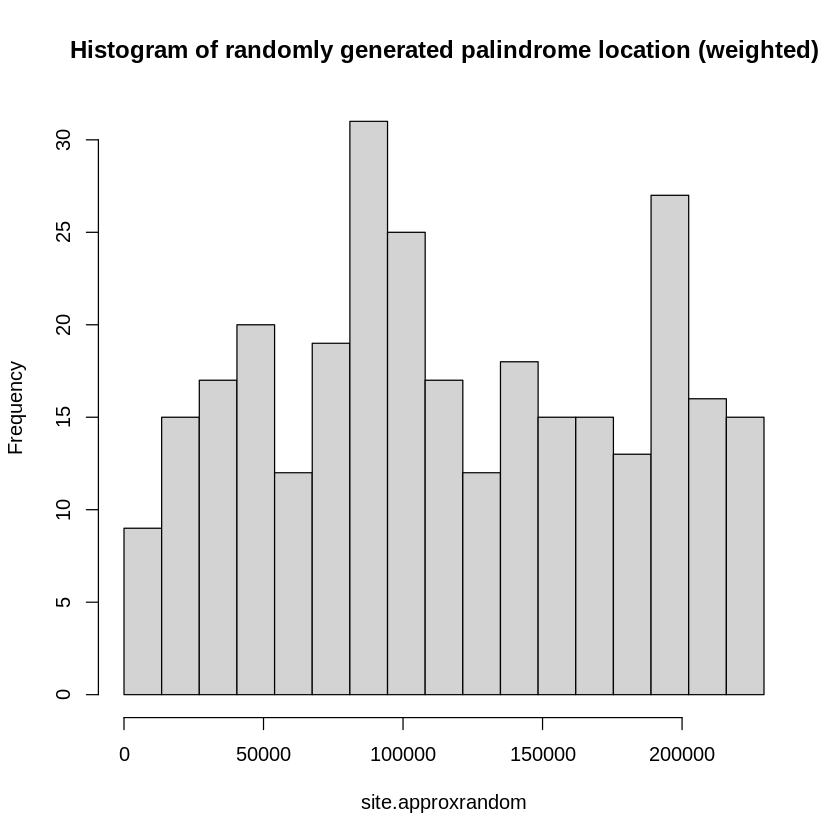

In [ ]:
R.hist = hist(site.approxrandom, breaks = seq(0, L, by = M), main = "Histogram of randomly generated palindrome location (weighted)")

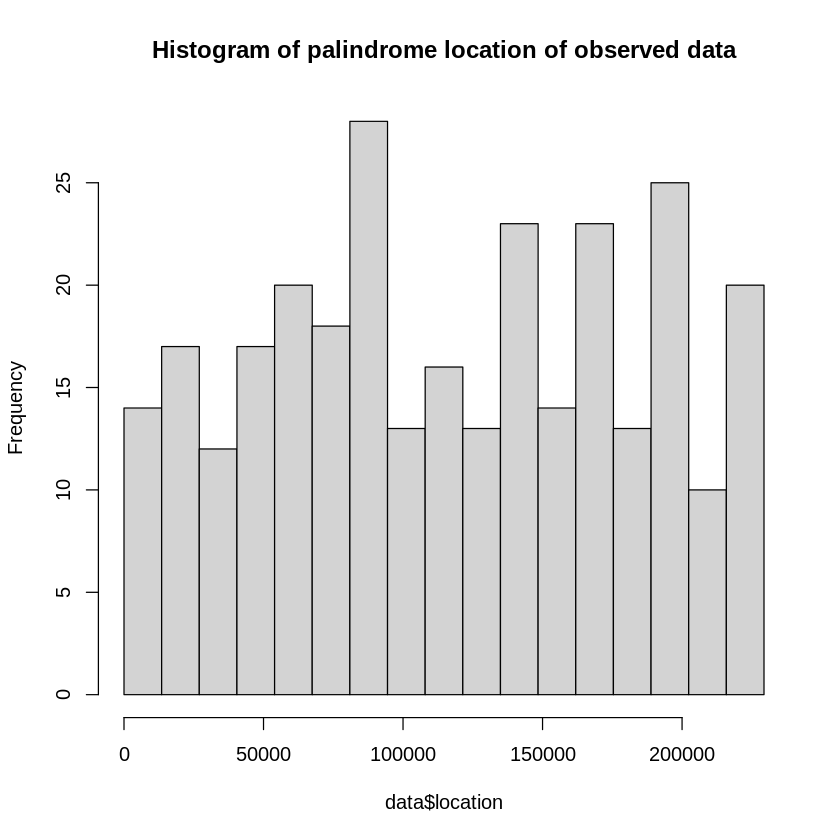

In [ ]:
L = 229364 # the DNA sequence of CMV is 229354 letters long
n = 296 # the amount of observations (palindromes) we have
# how big to make one bin? Arbitrarily I will choose 13492, as L is divisible by that
M = 13492
D.hist = hist(data$location, breaks = seq(0, L, by = M), main = "Histogram of palindrome location of observed data")

So now we want to check if the observed data follows the distribution of the weighted randomly generated data, where we assigned greater weightage to the suspected locations of origin of replication

Null Hypothesis: The observed location of palindromes follows the weighted distribution

Alternative Hypothesis: The observed location of palindromes does not follow the weighted distribution

In [ ]:
chi_sq_stat = sum((D.hist$counts - R.hist$counts)^2/R.hist$counts)
chi_sq_stat

[1] 26.33051

In [ ]:
p_value = 1 - pchisq(chi_sq_stat, df = m-1)
p_value

[1] 0.04955145

Conclusion: Under the significance level of 0.01, the p-value of chi-square test is 0.050 which is greater than 0.01, thus there is insufficient evidence to reject the null hypothesis and we can conclude that the observed location of palindromes follows the weighted distribution.

# Testing the goodness of fit of the spacing distributions of palindromes

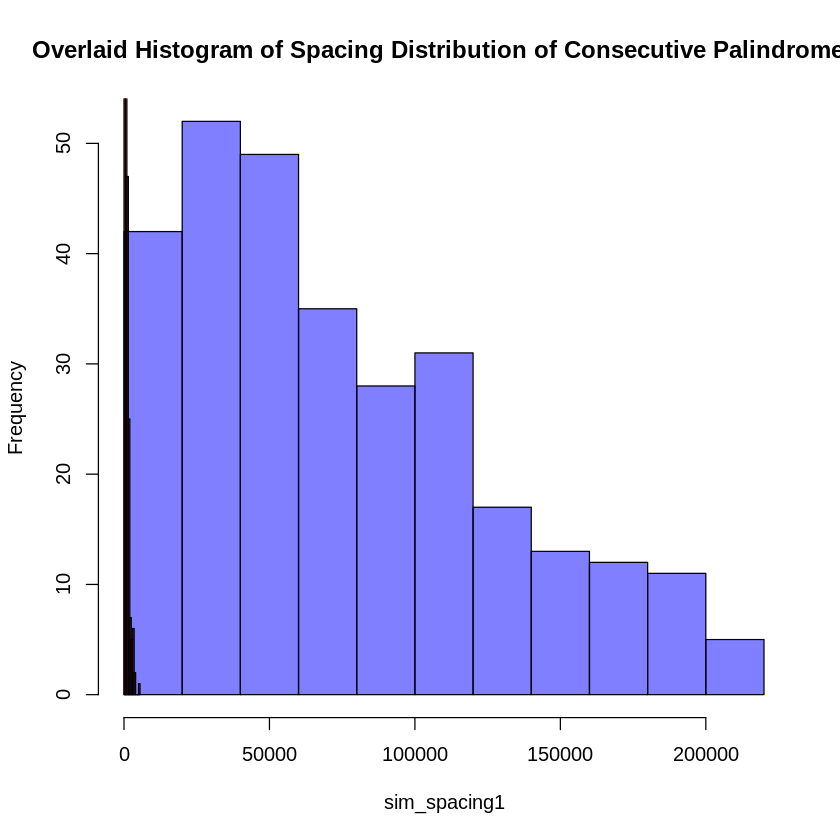

In [ ]:
sim_hist = hist(sim_spacing1, col=rgb(0,0,1,0.5), main = "Overlaid Histogram of Spacing Distribution of Consecutive Palindromes")
obs_hist = hist(obs_spacing1, col=rgb(1,0,0,0.5), add = T)

In [ ]:
chi_sq_stat = sum((sim_hist$counts - obs_hist$counts)^2/sim_hist$counts)
chi_sq_stat

[1] 340.9521

In [ ]:
p_value = 1 - pchisq(chi_sq_stat, df = m-1)
p_value

[1] 0

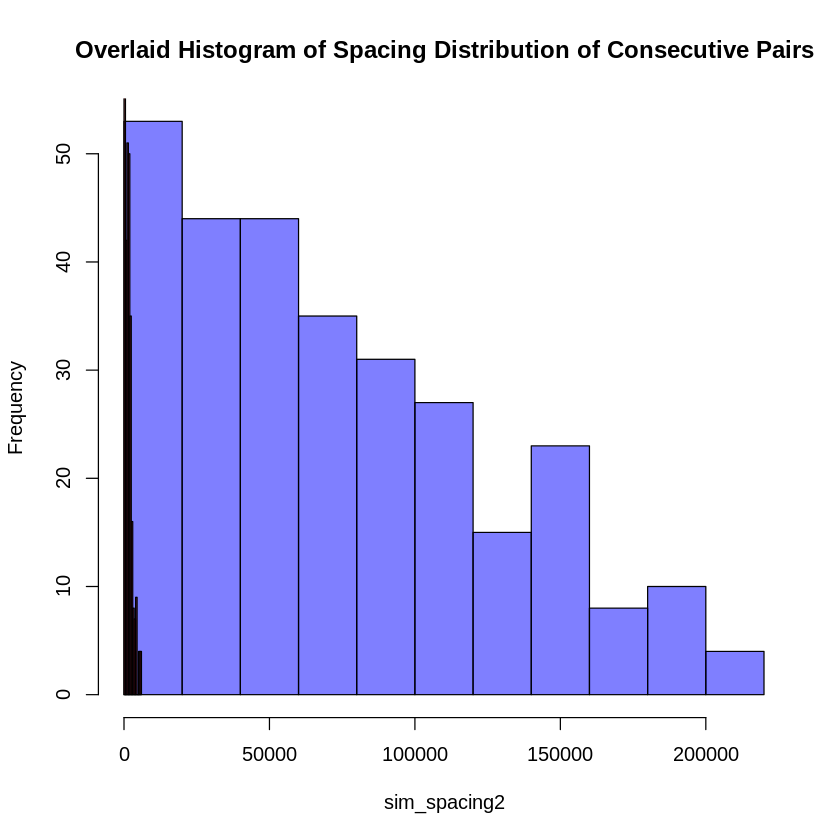

In [ ]:
sim_hist = hist(sim_spacing2, col=rgb(0,0,1,0.5), main = "Overlaid Histogram of Spacing Distribution of Consecutive Pairs")
obs_hist = hist(obs_spacing2, col=rgb(1,0,0,0.5), add = T)

In [ ]:
chi_sq_stat = sum((sim_hist$counts - obs_hist$counts)^2/sim_hist$counts)
chi_sq_stat
p_value = 1 - pchisq(chi_sq_stat, df = m-1)
p_value

Warning message in sim_hist$counts - obs_hist$counts:
“longer object length is not a multiple of shorter object length”
Warning message in (sim_hist$counts - obs_hist$counts)^2/sim_hist$counts:
“longer object length is not a multiple of shorter object length”


[1] 86.7

[1] 1.009615e-11

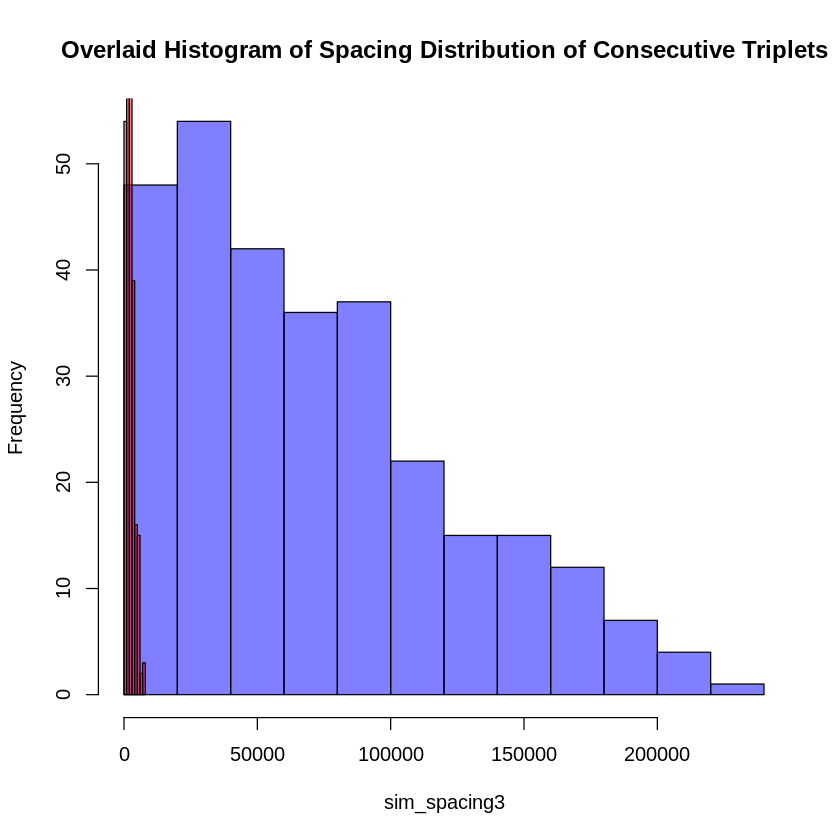

In [ ]:
sim_hist = hist(sim_spacing3, col=rgb(0,0,1,0.5), main = "Overlaid Histogram of Spacing Distribution of Consecutive Triplets")
obs_hist = hist(obs_spacing3, col=rgb(1,0,0,0.5), add = T)

In [ ]:
chi_sq_stat = sum((sim_hist$counts - obs_hist$counts)^2/sim_hist$counts)
chi_sq_stat
p_value = 1 - pchisq(chi_sq_stat, df = m-1)
p_value

Warning message in sim_hist$counts - obs_hist$counts:
“longer object length is not a multiple of shorter object length”


[1] 3952.797

[1] 0